# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

A used car dealership would like to understand what factors determine the price of a car. 
I assume that not only listing the factors but also indicating their relative importance would benefit the client.
To achieve the client's goal, I will:
1) Conduct an exploratory data analysis (EDA) to visualize the impact of each individual factor on car price.
2) Build a regression model that will predict the car price and the impact of various factors in combination. 

# Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

## My preliminary plan:
In order to gain understanding of the data, I am planning on the following steps:
- Convert the CSV file into a Pandas DataFrame.
- Review the DataFrame Sample or Head to get an idea about the possible values of each field.
- Review Shape and Info to understand the counts and the shape of the data
- using the describe method, look at the summary statistics for numerical values
- Count the the null values and then determine what to do with them 
- Review possible values for each field to see if they can be combined or cleaned up. 

In [1]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")

from sklearn.inspection import permutation_importance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("C:/Users/dkaza/Downloads/vehicles.csv")

In [3]:
data.sample(5)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
192544,7311566976,worcester / central MA,18888,2010.0,ford,f-250,NaN,NaN,gas,55536.0,clean,automatic,1FTNF2B58AEB13756,4wd,NaN,pickup,NaN,ma
214160,7316704619,minneapolis / st paul,0,2020.0,ford,expedition limited,NaN,6 cylinders,gas,23864.0,clean,automatic,1FMJU2AT3LEA34661,4wd,NaN,SUV,NaN,mn
2403,7310263899,gadsden-anniston,32990,2018.0,acura,mdx sh-awd w/technology,good,6 cylinders,gas,31967.0,clean,other,5J8YD4H59JL010087,NaN,NaN,other,brown,al
385948,7314638068,salt lake city,25990,2019.0,ram,1500 classic regular cab,good,8 cylinders,gas,12302.0,clean,other,3C6JR6DT3KG560649,NaN,NaN,pickup,white,ut
372922,7307577704,el paso,11500,2003.0,ford,f550,excellent,8 cylinders,diesel,93000.0,clean,automatic,NaN,rwd,full-size,truck,white,tx


In [4]:
data.shape

(426880, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

**Observation:** "year" is usually an integer, but here it is a Float. Need to examine and treat this field. 

Next, let us convert the data type "object" to "category". `converting "objects" to "category". 
This will reduce the data space required to store the dataframe`

In [6]:
cols = data.select_dtypes(['object']).columns.tolist()
cols

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

In [7]:
# Changing the data type of object type column to category. 
for i in cols:
    data[i] = data[i].astype('category')

    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   id            426880 non-null  int64   
 1   region        426880 non-null  category
 2   price         426880 non-null  int64   
 3   year          425675 non-null  float64 
 4   manufacturer  409234 non-null  category
 5   model         421603 non-null  category
 6   condition     252776 non-null  category
 7   cylinders     249202 non-null  category
 8   fuel          423867 non-null  category
 9   odometer      422480 non-null  float64 
 10  title_status  418638 non-null  category
 11  transmission  424324 non-null  category
 12  VIN           265838 non-null  category
 13  drive         296313 non-null  category
 14  size          120519 non-null  category
 15  type          334022 non-null  category
 16  paint_color   296677 non-null  category
 17  state         426880 non-null

In [8]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


**Observation:** There must be outliers in price, such as the $3.7 billion dollar car. A box plot would make it easy to see the outliers. 

## Checking for Duplicate Records
VIN is a unique identifier for a car. So, we should have only one record for each VIN. Let us see if there are more than one.

In [9]:
# Counting the duplicate VIN values
duplicate_count = data[data['VIN'].duplicated(keep=False)].shape[0]

print(duplicate_count)

348914


**Observation:** This is crazy! There are lots of duplicate cars! Let us look at them. 

In [10]:
# Find the VIN values that are duplicated
duplicated_vins = data['VIN'][data['VIN'].duplicated(keep=False)].unique()

# Filter the data DataFrame to retain only rows with duplicated VIN values
duplicates_df = data[data['VIN'].isin(duplicated_vins)]

# Sort the resulting DataFrame by VIN values
duplicates_df = duplicates_df.sort_values(by='VIN')

In [11]:
duplicates_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
180517,7307604893,maine,0,2017.0,toyota,highlander limited,NaN,NaN,gas,29345.0,clean,automatic,0,NaN,NaN,NaN,NaN,me
45130,7309043388,palm springs,45000,1973.0,chevrolet,corvette stingray,excellent,8 cylinders,gas,65000.0,clean,manual,0,NaN,NaN,convertible,NaN,ca
32544,7313782174,inland empire,1,1900.0,NaN,All,fair,other,other,100000.0,clean,other,0,NaN,NaN,other,custom,ca
178584,7314069875,maine,0,2017.0,toyota,highlander limited,NaN,NaN,gas,29345.0,clean,automatic,0,NaN,NaN,NaN,NaN,me
180251,7308485299,maine,0,2018.0,toyota,highlander limited,NaN,NaN,gas,29345.0,clean,automatic,0,NaN,NaN,NaN,NaN,me


In [12]:
duplicates_df.tail()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426840,7302181162,wyoming,65999,2017.0,NaN,2017,NaN,NaN,diesel,73000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426841,7302155994,wyoming,16999,2014.0,NaN,2014,NaN,NaN,gas,89000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426842,7302138344,wyoming,22999,2013.0,NaN,2013,NaN,NaN,gas,120000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426843,7302129327,wyoming,21999,2017.0,NaN,2017,NaN,NaN,gas,51000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy
426846,7302118268,wyoming,41999,2015.0,NaN,2015,NaN,NaN,gas,126000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wy


**Observation:** It appears that VIN records equal to 0 or NaN count as duplicate. That is fine. This does not mean that these are corrupted records. Let us look at duplicates  where VIN is not "0" or "NaN"

In [13]:
# Filter out rows with VIN equal to 0 or NaN
filtered_data = data[(data['VIN'] != 0) & (data['VIN'].notna())]

# Find the VIN values that are duplicated
duplicated_vins = filtered_data['VIN'][filtered_data['VIN'].duplicated(keep=False)].unique()

# Filter the data DataFrame to retain only rows with duplicated VIN values
duplicates_df = filtered_data[filtered_data['VIN'].isin(duplicated_vins)]

# Sort the resulting DataFrame by VIN values
duplicates_df = duplicates_df.sort_values(by='VIN')

In [14]:
duplicates_df.tail(20)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
42907,7314532423,orange county,48988,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,32742.0,clean,automatic,ZN661XUA4HX264276,NaN,NaN,SUV,black,ca
255834,7310661693,north jersey,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,nj
333310,7314457425,philadelphia,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,pa
274729,7317032951,new york city,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,ny
252275,7305155567,central NJ,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,nj
250100,7314395370,central NJ,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,nj
250101,7314386734,central NJ,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,nj
253641,7315784764,north jersey,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,nj
276364,7315610938,new york city,36995,2017.0,NaN,MASERATI LEVANTE,NaN,NaN,gas,58959.0,clean,automatic,ZN661XUAXHX215714,NaN,NaN,SUV,NaN,ny
336834,7312023587,pittsburgh,43991,2017.0,NaN,Maserati LEVANTE LUXURY,excellent,6 cylinders,gas,47891.0,NaN,automatic,ZN661XUL7HX239289,4wd,NaN,SUV,NaN,pa


**Observation:** 

When two or more records have the same VIN, these are duplicate records. It appears that the same car was listed for sale on multiple occasions (for example, in multiple states).

So, we want to eliminate duplicate records in a way that each VIN appears to be only once.

The exception are the records where VIN is listed as "0" or "NaN". We have no reasons to believe that these are duplicate records. 

In [15]:
# Filter out rows where VIN is 0 or NaN
zero_nan_df = data[(data['VIN'] == 0) | (data['VIN'].isna())]

# Drop duplicates for other VIN values, keeping the first occurrence
unique_vin_df = data[~(data['VIN'] == 0) & data['VIN'].notna()].drop_duplicates(subset='VIN', keep='first')

# Concatenate the two DataFrames
result_df = pd.concat([zero_nan_df, unique_vin_df])

result_df.shape

(279288, 18)

**Observation:** 

We have a liminated quite a few duplicates. From the original dataframe of 426,880 records, we have only 279,288 records left. 35% of records have been eliminated.

However, this is for a good cause. Now the model will be more useful (better applicable to the real world), sicne it will not count the same records multiple times.

## Price
Let us examine the Price column very carefully--cnce it is the target that we want to predict.

In [16]:
# Firs, we create a function to easily render the boxplot and histogram for numerical variabls
def plot_histogram_boxplot(df, column_name):
    
    # Set up the figure and axes
    fig, ax = plt.subplots(2, 1, figsize=(10, 8))
    
    # Histogram
    ax[0].hist(df[column_name].dropna(), bins=30, edgecolor='k', alpha=0.65)
    ax[0].set_title(f'Histogram of {column_name}')
    ax[0].set_xlabel(column_name)
    ax[0].set_ylabel('Frequency')
    
    # Box plot
    sns.boxplot(x=df[column_name], ax=ax[1])
    ax[1].set_title(f'Box plot of {column_name}')
    
    plt.tight_layout()
    plt.show()


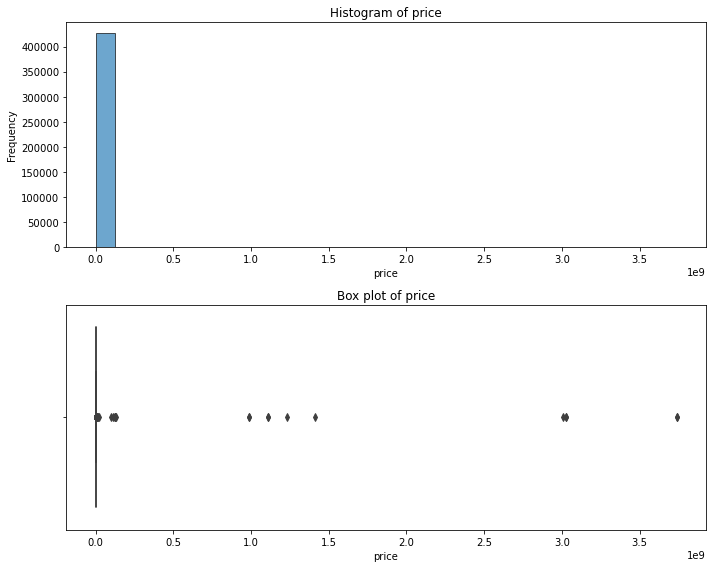

In [17]:
#Let us see how price is distributed
plot_histogram_boxplot(data, 'price')

**Observation:** indeed, there are a outliers that cost up to billions. Based on my knowledge of ultra-expensive cars (for example, listed here: https://heycar.co.uk/guides/most-expensive-cars-in-the-world), the most expensive cars cost millions (and not billions). The prices in billions must be bogus data. We will want to remove them. Based on my research 400k is a cut off price for all cars except for the super-rare "hypercars". Let us look at the cars listed here with the price of $400k or greater. 

In [18]:
#Let us look at the records of cars with price over 1 million
fourhundredk_cars = data[data['price'] >= 400000]

# Displaying the records
fourhundredk_cars.sample(30)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
280,7315849335,birmingham,987654321,1960.0,chevrolet,NaN,NaN,NaN,gas,999999.0,clean,manual,NaN,NaN,NaN,NaN,NaN,al
133497,7316029298,east idaho,425000,1993.0,jeep,wrangler,NaN,NaN,gas,380.0,clean,automatic,NaN,NaN,NaN,NaN,red,id
194292,7307876060,ann arbor,1234567,2010.0,lincoln,mkt ecoboost,like new,NaN,gas,85653.0,clean,automatic,2LMHJ5AT1ABJ50124,NaN,full-size,SUV,custom,mi
232829,7313752706,charlotte,1000000,2016.0,ford,f150,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,nc
68935,7302895209,ventura county,2000000,2002.0,saturn,l-series l200 4dr sedan,good,4 cylinders,gas,164290.0,clean,automatic,NaN,fwd,mid-size,sedan,green,ca
241404,7313748377,raleigh / durham / CH,113456789,1980.0,bmw,NaN,NaN,NaN,gas,100000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,nc
193736,7315524207,ann arbor,123456789,2015.0,chevrolet,cruze,like new,NaN,gas,64181.0,clean,automatic,1G1PC5SB0F7246637,fwd,compact,sedan,red,mi
367296,7304059523,college station,1234567,1955.0,chevrolet,NaN,NaN,NaN,other,99999.0,missing,other,NaN,NaN,NaN,NaN,NaN,tx
184704,7304345156,frederick,1410065407,1989.0,jeep,wrangler,NaN,NaN,diesel,103000.0,clean,manual,NaN,NaN,NaN,SUV,NaN,md
416145,7317067334,eau claire,999999,2006.0,ford,f-350,NaN,8 cylinders,diesel,204123.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,wi


**Observation:** Absolute majority of the cars listed here cannot cost such prices. 

For example:
- a price of 1,410,065,407 billion USD for 1989 jeep wrangler is wrong
- Same with the 3,009,548,743 USD Toyota 2021 chevy
- Prices of 123,456,789 USD on some of the cars seem bogus too

This is clearly bogus data, which we will have to delete. Only four of these cars (the Lambo, the Ferrari, the Hino semi truck, and the Mercedes) have prices that might be legitimate. But let us delete these four anyway, since they will surely be the outliers. (A Hino semi truck is not even a car).

In [19]:
# Removing the rows where 'price' is equal to or greater than 400,000
data = data[data['price'] < 400000]

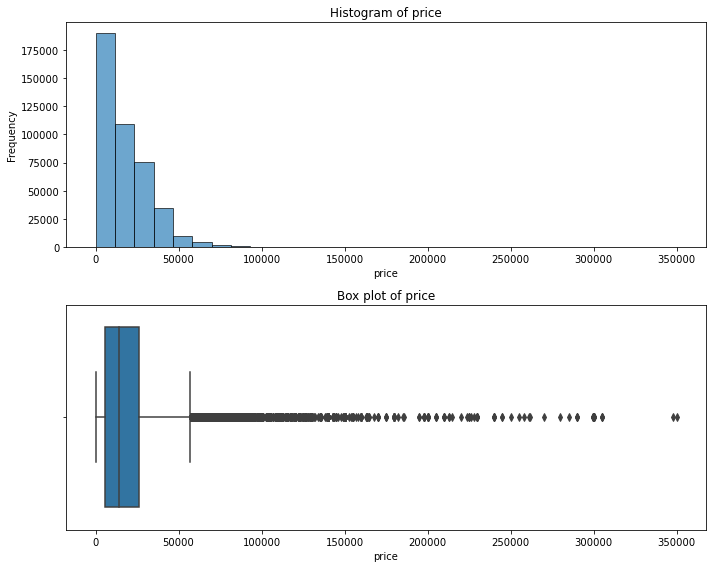

In [20]:
# Now let see the price again
#Let us see how price is distributed
plot_histogram_boxplot(data, 'price')

**Observations:**

- Even after removing the above cars that clearly had bogus prices, we have some outliers. In the Data Preparation section below, we will want to treat them. 
- Price distribution is highly skewed. We will need to do a Log transformation for it. 

In [21]:
#let us sum the nuls by column
data.isnull().sum().sort_values()

id                   0
price                0
state                0
region               0
year              1205
transmission      2555
fuel              3013
odometer          4400
model             5254
title_status      8242
manufacturer     17633
type             92812
paint_color     130158
drive           130522
VIN             160982
condition       174062
cylinders       177635
size            306310
dtype: int64

<AxesSubplot:title={'center':'NaN / Null value counts by column'}>

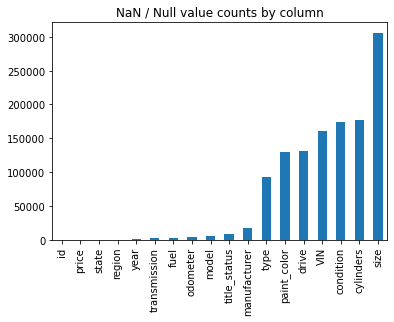

In [22]:
#Let us make a bar blot to visualize the null counts
data.isnull().sum().sort_values().plot(kind = 'bar', title = 'NaN / Null value counts by column')

**Observation:** lots of columns have null values, which will have to be treated

# Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## My preliminary plan:
Based on the insight gained from the Data Understanding activities above, I will likely do some or all of the following:
- Remove fields that add no value, such as "ID" and "VIN"
- Treat the outliers
- Eliminate odd characters or and/or nonsensical values. 
- Look at the values for each field to see if they could be combined or otherwise cleaned up. For example, if I see "Sedan" and "sedan" for Body Type, then I will combine the two.
- Treat the Null values. Most likely I will:
   - Delete records that mostly contain null values
   - Impute the null values for records that have some nulls, but also several useful fields
- Transform some of the data fields, which might include:
   - Log transformation
   - Scaling
   - Creating derived features, such as polynomial features. I might want to combine this step into a pipe

In [23]:
# Dropping the 'id' and 'vin' columns. They are unique to each car and add no value to the model. 
data = data.drop(columns=['id', 'VIN'])
data.sample(5)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
138974,twin falls,29875,2020.0,mazda,cx-5,NaN,NaN,gas,25067.0,clean,automatic,NaN,NaN,NaN,NaN,id
53995,sacramento,0,2019.0,chevrolet,suburban,excellent,NaN,gas,40574.0,clean,automatic,4wd,NaN,NaN,NaN,ca
379264,mcallen / edinburg,3000,2015.0,jeep,grand cherokee,like new,6 cylinders,gas,100256.0,clean,automatic,rwd,mid-size,other,white,tx
252785,jersey shore,2900,2005.0,toyota,scion,fair,NaN,gas,187000.0,clean,automatic,NaN,NaN,NaN,red,nj
134826,lewiston / clarkston,37995,2018.0,toyota,tundra double cab,NaN,8 cylinders,gas,71767.0,clean,automatic,4wd,NaN,pickup,white,id


In [24]:
#Let us get unique value counts for each column 
unique_counts = data.apply(lambda x: x.nunique())
print(unique_counts)

region             404
price            15620
year               113
manufacturer        42
model            29638
condition            6
cylinders            8
fuel                 5
odometer        104867
title_status         6
transmission         3
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64


**Observations:**
- 404 Regions is a lot for a regression model. We will have to drop this column
- 29,649 models is too many. Perhaps it was a free-form text field, and everyone was entering the model description as they please without any standards. While model must be an important predictor of a price, so many values will make the regression modeling challenging. We will have to drop this column
- 6 values for "title status" is too many. We might want to combine some of them. 
- United States has only 50 states. The 51st value must be some sort of a US territory (or DC) or a state entered incorrectly. 


In [25]:
data = data.drop(columns=['model', 'region'])
data.sample(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
170601,16900,2020.0,kia,excellent,NaN,gas,22901.0,clean,automatic,fwd,NaN,SUV,black,ky
241001,4900,2007.0,ford,excellent,6 cylinders,gas,226401.0,clean,automatic,rwd,NaN,pickup,white,nc
349203,35590,2020.0,lexus,good,NaN,gas,6185.0,clean,other,fwd,NaN,hatchback,white,sc
277629,8500,2016.0,dodge,excellent,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny
275356,5900,2015.0,toyota,like new,4 cylinders,gas,247203.0,clean,automatic,fwd,full-size,wagon,yellow,ny


Next, let us look at all of the unique values of all columns to see if there are any other odd things that need to be fixed. 

In [26]:
# Print unique values for each column
for column in data.columns:
    unique_values = data[column].unique()
    print(f"\033[1m{column}:\033[0m \n{unique_values}\n")

price: 
[ 6000 11900 21000 ...  6328 19853 17873]

year: 
[  nan 2014. 2010. 2020. 2017. 2013. 2012. 2016. 2019. 2011. 1992. 2018.
 2004. 2015. 2001. 2006. 1968. 2003. 2008. 2007. 2005. 1966. 2009. 1998.
 2002. 1999. 2021. 1997. 1976. 1969. 1995. 1978. 1954. 1979. 1970. 1974.
 1996. 1987. 2000. 1955. 1991. 1972. 1988. 1994. 1929. 1984. 1986. 1989.
 1973. 1946. 1933. 1958. 1937. 1985. 1957. 1953. 1942. 1963. 1977. 1993.
 1903. 1990. 1965. 1982. 1948. 1983. 1936. 1932. 1951. 1931. 1980. 1967.
 1971. 1947. 1981. 1926. 1962. 1975. 1964. 1934. 1952. 1940. 1959. 1950.
 1930. 1956. 1960. 1922. 1928. 2022. 1901. 1941. 1924. 1927. 1939. 1923.
 1949. 1961. 1935. 1918. 1900. 1938. 1913. 1916. 1943. 1925. 1921. 1915.
 1945. 1905. 1920. 1944. 1910. 1909.]

manufacturer: 
[NaN, 'gmc', 'chevrolet', 'toyota', 'ford', ..., 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan']
Length: 43
Categories (42, object): ['acura', 'alfa-romeo', 'aston-martin', 'audi', ..., 'tesla', 'toyota', 'volk

**Observations**:

    - Year values are floats, but they actually are integers.
    - Odometer values appear to be integers, but are expressed as floats.
    - As I suspected the 51st "state" is "DC", which is fine
    - some of the variables, we might want to transform into ordinal values. For example:
        - condition: salvage, fair, good, excellent, like new, new:
        - size: sub-compact, compact, mid-size, full-size
    - We might want to change Cyliders int integers: 3, 4, 6, 8, etc. 


**Before we apply additonal transformation, let us create a copy of the dataframe, so that we keep the original version**

In [27]:
df = data

## Treating the NaN values

Typically, there are two approaches to treating the records with NaNs:
1) Delete such records
 - or -
2) Impute the NaNs with Median (for numerical) and Mode (for categorical)

The disadvantage of the first method, is that we might lose a lot, if not all, records
The disadvantage of the 2nd method is that we introduce bogus information. For example, if, manufacturer is unknown, we might end up replacing the data with "Ford" (if it is the most common manufacturer in the US--even though Ford has a market share that is far from majority. Then we will build the model based on this inaccurate assumption. 

I'd like to use a combination approach, where:
1) I will delete records that mostly contain NaNs
2) For the records that contain few NaNs per record, I'd like to impute them

For categorical variables, I might consider replacing "NaN" with "unknown"



In [28]:
# Create 'countnull' column that counts null fields per record
df['countnull'] = df.isnull().sum(axis=1)

In [29]:
df.sample(5)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,countnull
121173,92990,2020.0,rover,NaN,NaN,other,6635.0,NaN,automatic,4wd,full-size,SUV,NaN,ga,4
25738,2000,2007.0,cadillac,excellent,8 cylinders,gas,160893.0,NaN,automatic,4wd,NaN,SUV,NaN,ca,3
260664,18590,2017.0,chevrolet,good,NaN,gas,25705.0,clean,other,fwd,NaN,sedan,white,nm,2
162084,26990,2008.0,chevrolet,good,8 cylinders,gas,100921.0,clean,automatic,4wd,full-size,truck,white,ia,0
390755,0,2016.0,chevrolet,NaN,8 cylinders,other,2522.0,clean,automatic,fwd,compact,other,NaN,va,2


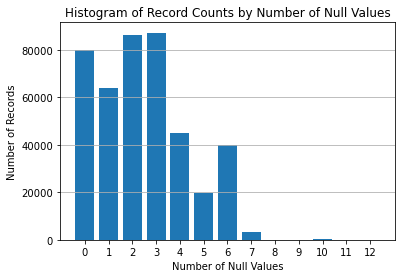

In [30]:
# Plot histogram for null values by record
plt.hist(df['countnull'], bins=range(0, df['countnull'].max() + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Null Values')
plt.ylabel('Number of Records')
plt.title('Histogram of Record Counts by Number of Null Values')
plt.xticks(range(0, df['countnull'].max() + 1))
plt.grid(axis='y')
plt.show()

**Observation:** Unfortunately, there are lots of records with too many Null values. 
Per strategy outlined above, let us eliminate the records that have more than 3 Null values. This will still give us a lot of records to work with, and we won't have to impute values in too many records. 

In [31]:
#Let us drop records with more than 3 missing values
df.drop(df[df['countnull'] > 3].index, inplace = True)

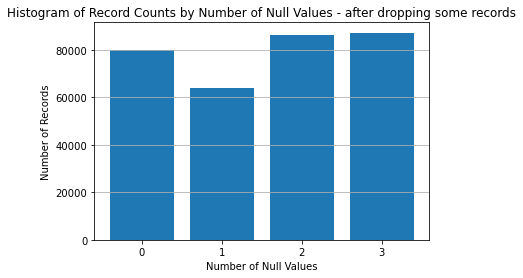

In [32]:
# Let us look at the same histogram to confirm we did the right thing.
plt.hist(df['countnull'], bins=range(0, df['countnull'].max() + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Null Values')
plt.ylabel('Number of Records')
plt.title('Histogram of Record Counts by Number of Null Values - after dropping some records')
plt.xticks(range(0, df['countnull'].max() + 1))
plt.grid(axis='y')
plt.show()

In [33]:
#We can now drop the "countnull" column
df = df.drop('countnull', axis=1)

In [34]:
df.shape

(317917, 14)

We still have a decent number of records left for modeling. We can impute the NaNs in the remaining records.

In [35]:
# Let us check summary for categorical data
df.describe(include=['category']).T

,count,unique,top,freq
manufacturer,309328,42,ford,51696
condition,229982,6,good,113488
cylinders,234439,8,6 cylinders,88695
fuel,317213,5,gas,266523
title_status,315274,6,clean,305124
transmission,317859,3,automatic,243082
drive,270780,3,4wd,118407
size,118608,4,full-size,62506
type,296658,13,sedan,77895
paint_color,271931,12,white,70789


## Imputing the remaining NaNs
Now let us impute the remaining NaNs
- for numerical columns, we will impute them with Median
- for categorical columns, we will impute them with Mode

In [36]:
# First let us repeat the count of NaNs per column:
#let us sum the nuls by column
df.isnull().sum().sort_values()

price                0
state                0
year                 6
transmission        58
fuel               704
odometer          1513
title_status      2643
manufacturer      8589
type             21259
paint_color      45986
drive            47137
cylinders        83478
condition        87935
size            199309
dtype: int64

In [37]:
# Treat Missing values in numerical columns with median and mode in categorical variables

# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist() 

# Fill numeric columns with median.
df[num_data.columns] = num_data.fillna(df[num_data.columns].median())

# Fill object columns with mode.
for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [38]:
#let us confirm that this worked
df.isnull().sum().sort_values()

price           0
year            0
manufacturer    0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317917 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         317917 non-null  int64   
 1   year          317917 non-null  float64 
 2   manufacturer  317917 non-null  category
 3   condition     317917 non-null  category
 4   cylinders     317917 non-null  category
 5   fuel          317917 non-null  category
 6   odometer      317917 non-null  float64 
 7   title_status  317917 non-null  category
 8   transmission  317917 non-null  category
 9   drive         317917 non-null  category
 10  size          317917 non-null  category
 11  type          317917 non-null  category
 12  paint_color   317917 non-null  category
 13  state         317917 non-null  category
dtypes: category(11), float64(2), int64(1)
memory usage: 13.0 MB


## Price

Let us examine the Price column carefully. Based on the distribution, I suspect that there are cars listed at a price of $0.00. Let us count them. This is important for two reasons:

  1) We cannot do a log transformation of 0, since Log(0) is undefined.
  2) The price of $0.00 is likely bogus information.

In [40]:
# Count records with a price of 0
count_zero_price = (df['price'] == 0).sum()

print(count_zero_price)

21795


**Observation:** That is crazy! So many cars listed at $0 price. Let us look at a sample

In [41]:
freecars = df[df['price'] == 0]
freecars.sample(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
347518,0,2014.0,bmw,good,6 cylinders,gas,66342.0,clean,automatic,rwd,mid-size,sedan,white,sc
604,0,2008.0,chevrolet,good,6 cylinders,gas,157476.0,clean,automatic,fwd,full-size,sedan,grey,al
291456,0,2014.0,chevrolet,excellent,4 cylinders,gas,150169.0,clean,automatic,fwd,compact,sedan,black,oh
298996,0,2014.0,ford,excellent,8 cylinders,gas,44675.0,clean,automatic,4wd,mid-size,truck,white,oh
354299,0,2017.0,ford,good,6 cylinders,gas,44629.0,clean,manual,fwd,full-size,hatchback,black,tn
175903,0,2015.0,chevrolet,good,8 cylinders,diesel,186091.0,clean,automatic,4wd,full-size,pickup,white,la
273635,0,2018.0,ford,excellent,6 cylinders,gas,1000.0,clean,automatic,4wd,full-size,SUV,red,ny
317877,0,2019.0,chevrolet,good,4 cylinders,gas,32709.0,clean,automatic,fwd,full-size,sedan,white,or
23597,0,2010.0,infiniti,like new,6 cylinders,gas,105000.0,clean,automatic,4wd,full-size,truck,black,ca
272953,0,2014.0,jeep,excellent,6 cylinders,gas,39754.0,clean,automatic,4wd,full-size,SUV,grey,ny


**Observation:** these are decent cars, which should not be priced at $0.00. These records are clearly wrong. Let us purge them and look at the distribution again.

In [42]:
# Drop records where price is 0
df = df[df['price'] != 0]

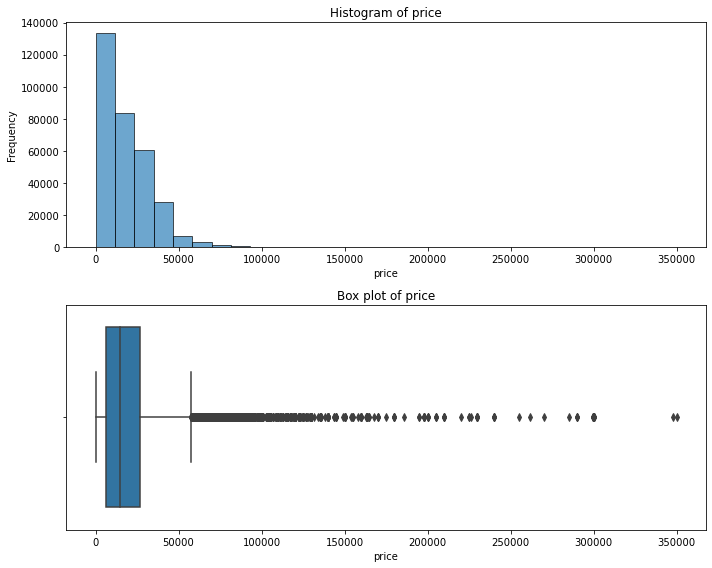

In [43]:
#Let us see how price is distributed after removing the "free" cars.
plot_histogram_boxplot(data, 'price')

Other than 0, the other suspicious price would be $1.00. Let us look at those cars:

In [44]:
dollarcars = df[df['price'] == 1]
dollarcars.sample(10)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
92869,1,2016.0,mercedes-benz,excellent,10 cylinders,gas,47065.0,clean,other,4wd,compact,sedan,silver,fl
11242,1,2014.0,chevrolet,excellent,6 cylinders,gas,128616.0,clean,automatic,rwd,full-size,sedan,red,az
92284,1,2015.0,lexus,excellent,10 cylinders,gas,30920.0,clean,other,4wd,compact,sedan,white,fl
93226,1,2017.0,ford,excellent,10 cylinders,gas,96220.0,clean,automatic,rwd,full-size,truck,white,fl
275290,1,1998.0,mercedes-benz,like new,4 cylinders,gas,156000.0,clean,automatic,rwd,compact,convertible,yellow,ny
293902,1,2007.0,chevrolet,like new,8 cylinders,gas,1.0,clean,automatic,4wd,full-size,SUV,grey,oh
73846,1,2005.0,subaru,salvage,4 cylinders,gas,133479.0,clean,manual,4wd,full-size,sedan,red,co
97357,1,2014.0,ford,excellent,4 cylinders,gas,77813.0,clean,automatic,rwd,mid-size,coupe,white,fl
315819,1,2012.0,toyota,good,4 cylinders,gas,122000.0,clean,automatic,fwd,full-size,sedan,white,or
278645,1,2002.0,chevrolet,good,6 cylinders,gas,110888.0,clean,automatic,rwd,full-size,sedan,green,ny


**Observation:** the $1.00 cars are also bogus records. Let us purge them too.

In [45]:
# Drop records where price is less than $1.00
df = df[df['price'] > 1]

Now, let us do the log transformation

In [46]:
# Create 'logprice' column
df['logprice'] = np.log(df['price'])

# Drop the original 'price' column
df = df.drop('price', axis=1)
df.sample(5)

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,logprice
16378,2006.0,ford,like new,8 cylinders,gas,132908.0,clean,automatic,4wd,full-size,truck,blue,az,9.546741
365477,2014.0,chevrolet,good,4 cylinders,gas,113835.0,clean,automatic,fwd,mid-size,sedan,custom,tx,9.295417
411718,2014.0,honda,excellent,4 cylinders,gas,87535.0,clean,automatic,4wd,full-size,SUV,white,wa,9.740969
406918,2015.0,jeep,good,6 cylinders,gas,84837.0,clean,automatic,4wd,full-size,SUV,white,wa,10.308919
173386,2015.0,mazda,good,4 cylinders,gas,56000.0,clean,manual,fwd,mid-size,sedan,black,ky,9.392662


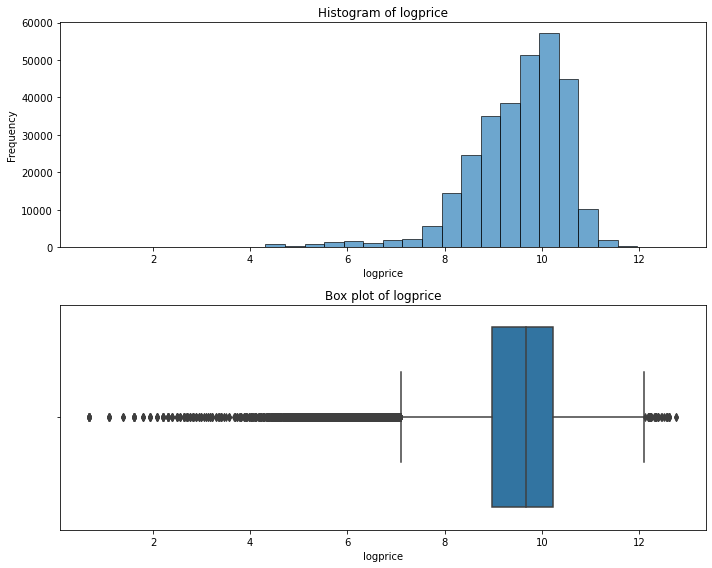

In [47]:
#Let us see the distribuion of LogPrice
plot_histogram_boxplot(df, 'logprice')

**Observation:** There are clear outliers. Let us treat them bu setting them at the upper and lower bounds. 

In [48]:
# Since we will be doing this a lot, let us define the function to treat outliers
def treat_outliers(df, column_name):
    
    # Calculate Q1, Q3, and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with appropriate bound
    df[column_name] = df[column_name].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df

In [49]:
# Let us treat the outliers in "logprice" column by replacing them with the uppor and lower bounds:
df = treat_outliers(df, 'logprice')

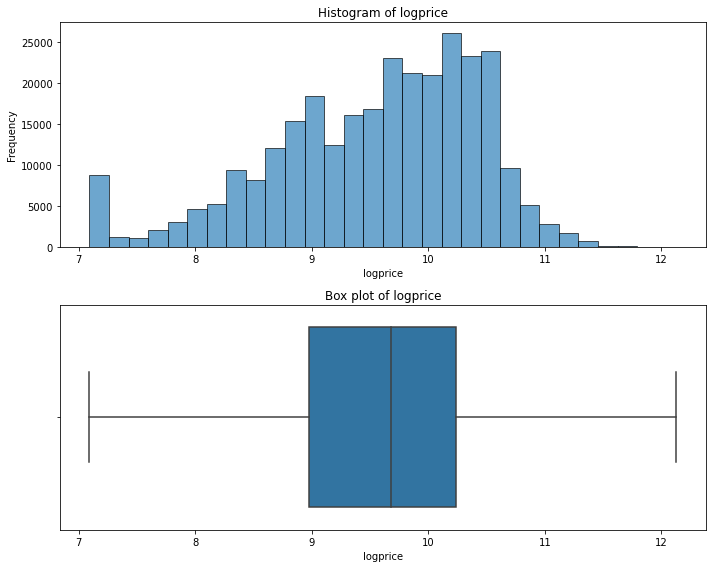

In [50]:
#Let us see how LogPrice is distributed after removing the outliers
plot_histogram_boxplot(df, 'logprice')

**Observations:**
 - after we deleted the bogus data, treated the outliers and did a log transformation, the price distribution seems more reasonable.
 - there are still lot of cheap cars. But we do not have strong reason to remove them. Perhaps these are the cars that are sold as "for parts only"

## Year

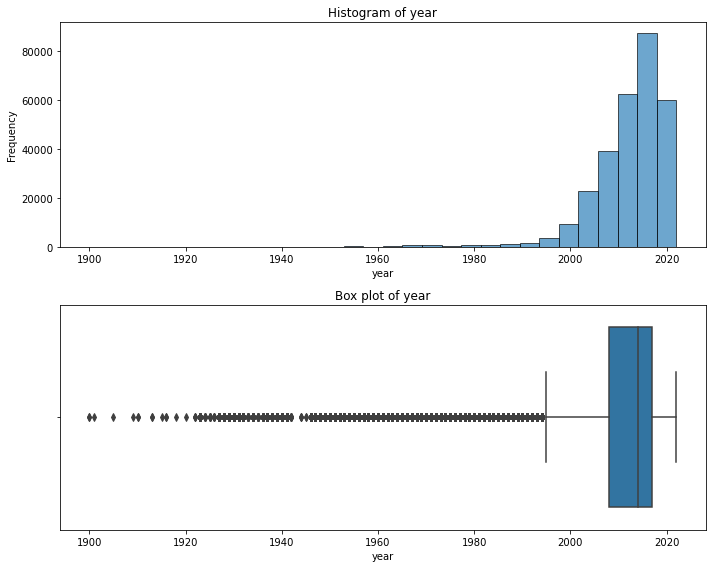

In [51]:
# Build the histogram boxplot for year
plot_histogram_boxplot(df, 'year')

**Observation:** most of the cars are relatively new. However, there a some very old "outlier" cars. Let us treat them using the earlier-created function

In [52]:
df = treat_outliers(df, 'year')

In [53]:
# As I sated earlier, "Year" data appears to be a float like 2019.0. But it should be an integer. 
# Let us transform it to Integer type
print('Initial data type for Year', df['year'].dtype)
df['year'] = df['year'].astype(int)
print('Data type for Year after treatment', df['year'].dtype)

Initial data type for Year float64
Data type for Year after treatment int32


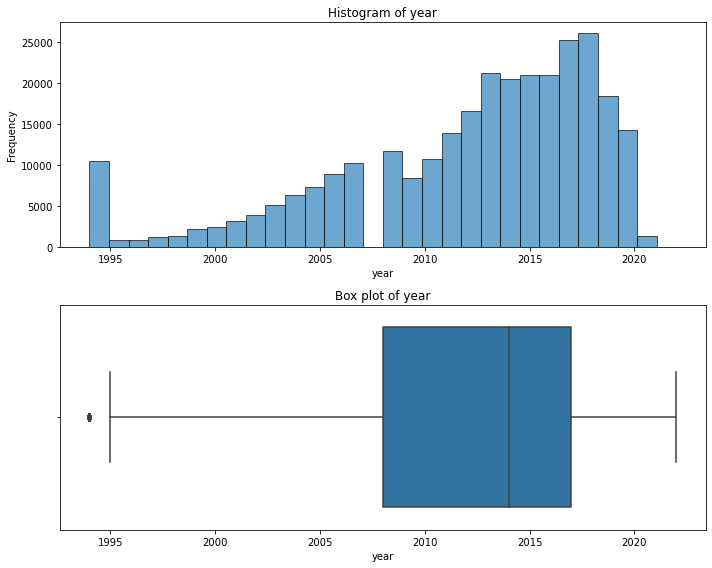

In [54]:
# Build the histogram boxplot for year after the treatment
plot_histogram_boxplot(df, 'year')

In [55]:
# We should also define a function to render Regplots for numerical variables
def render_regplot(df, column_x, column_y):
    """
    Renders a regplot for the specified columns of a DataFrame.
    
    Parameters:
    - df: The DataFrame
    - column_x: Column for the x-axis
    - column_y: Column for the y-axis
    
    Returns:
    None
    """
    plt.figure(figsize=(10, 6))
    sns.regplot(x=column_x, y=column_y, data=df, color='blue', line_kws={"color": "red"})
    plt.title(f'Regression plot of {column_x} vs {column_y}')
    plt.show()

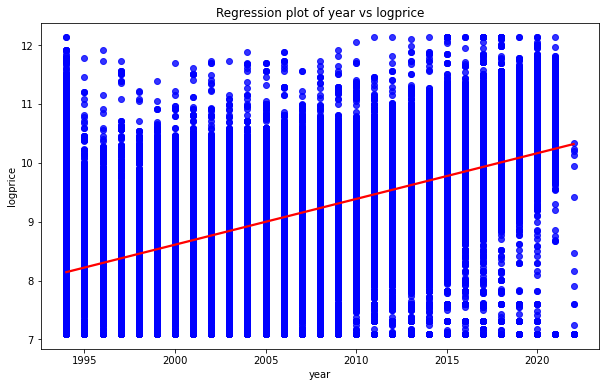

In [56]:
render_regplot(df, 'year', 'logprice')

**Observation:** There appears to be a positive relationship between the year of the car and its price. 
This makes sense. Newer cares are more expensive (with rare exception of super old collectible cars).

## Odometer

In [57]:
# As I sated earlier, "Odometer" data appears to be a float like 2019.0. But it should be an integer. 
# Let us transform it to Integer type
print('Initial data type for Odometer', df['odometer'].dtype)
df['odometer'] = df['odometer'].astype(int)
print('Data type for Odometer after treatment', df['odometer'].dtype)

Initial data type for Odometer float64
Data type for Odometer after treatment int32


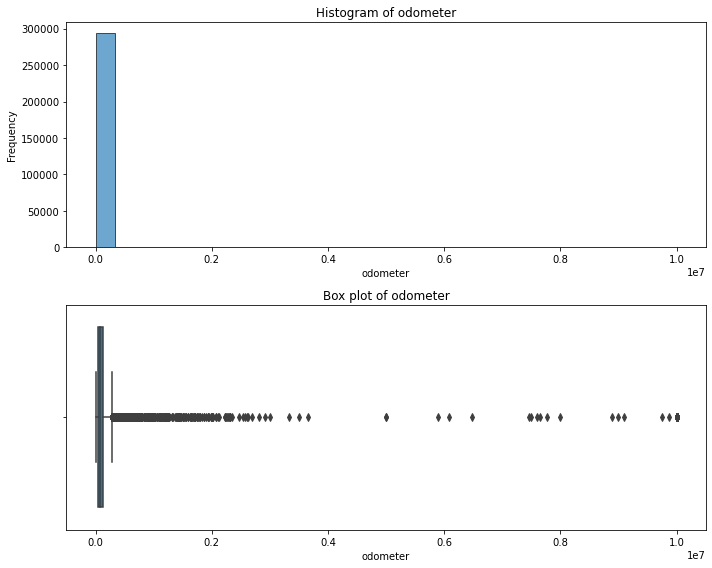

In [58]:
# Build the histogram boxplot for Odometer
plot_histogram_boxplot(df, 'odometer')

**Observation:** Once again, theer are tons of outliers wtih millions of miles, which seems odd. let us treat them.

In [59]:
df = treat_outliers(df, 'odometer')

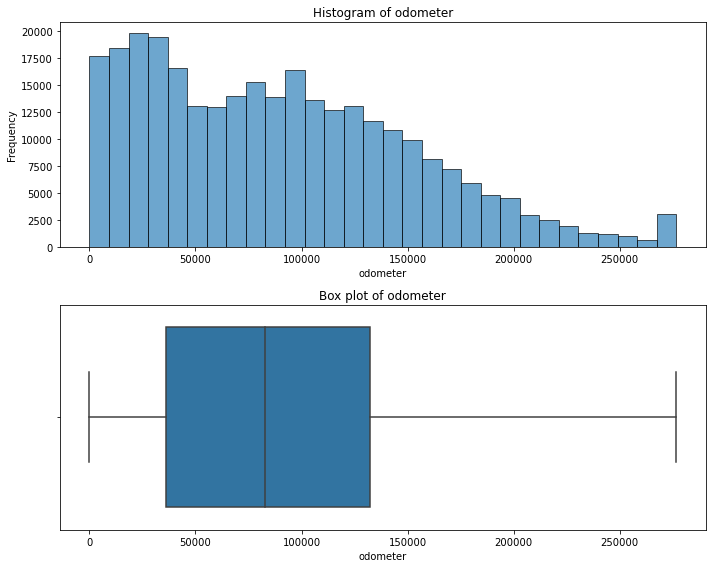

In [60]:
# Build the histogram boxplot for Odometer after the treatment
plot_histogram_boxplot(df, 'odometer')

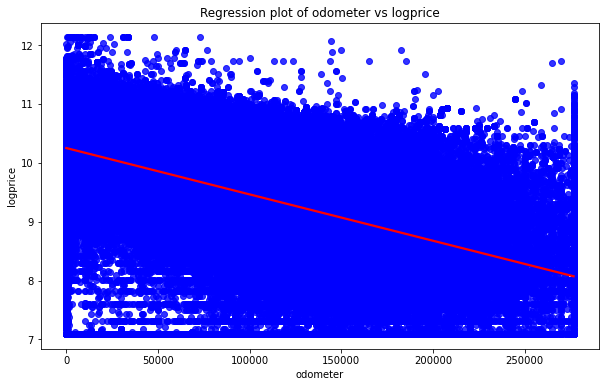

In [61]:
#let us see the Regplot
render_regplot(df, 'odometer', 'logprice')

**Observation:** There appears to be a negative relationship between Odometer and LogPrice. 
This makes sense. Cars with higher mileage tend to be cheaper.

## Categorical Variabel Analysis


In this section, we will review categorical variables, their distribution and impact on LogPrice.
Whenever appropriate, we will consolidate the values and/or transform the values.

In [62]:
# Let us create a function for rendering a bar plot for counts by the values of a Categorical column
def plot_categorical_bar(df, column_name):
    """
    Create a bar plot for a specified column containing categorical values.
    
    Parameters:
    - df: The DataFrame
    - column_name: The column for which to plot the bar graph
    
    """
    
    # Get the value counts for the column
    value_counts = df[column_name].value_counts()
    total = len(df)
    
    # Plot
    plt.figure(figsize=(15, 7))
    ax = value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    
    # Display percentage on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
                '{}%'.format(round(100 * height / total)),
                ha='center', va='bottom')
    
    plt.title(f'Bar plot of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [63]:
# Let us create a function that renders box plots for LogPrice by values of a categorical variable

def render_boxplot_for_column(df, column):
    """
    Renders a box plot for Logprice column broken down by a specified categorical column in df.
    
    Parameters:
    - df: The DataFrame
    - column: The categorical column
    
    """
    
    plt.figure(figsize=(15, 7))
    
    # Create a boxplot
    sns.boxplot(x=column, y='logprice', data=df)
    
    plt.title(f'Boxplot of LogPrice by {column}')
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.tight_layout()
    plt.show()

### Manufacturer

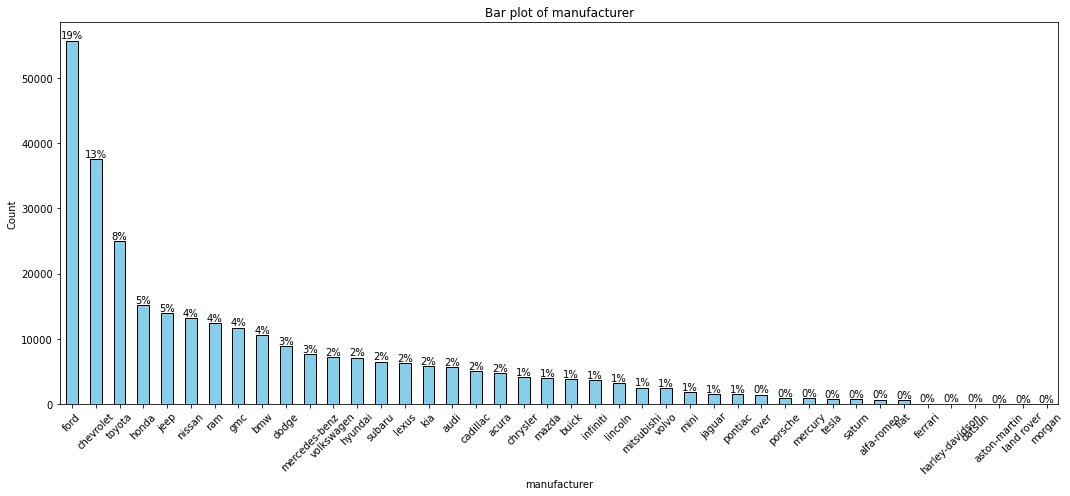

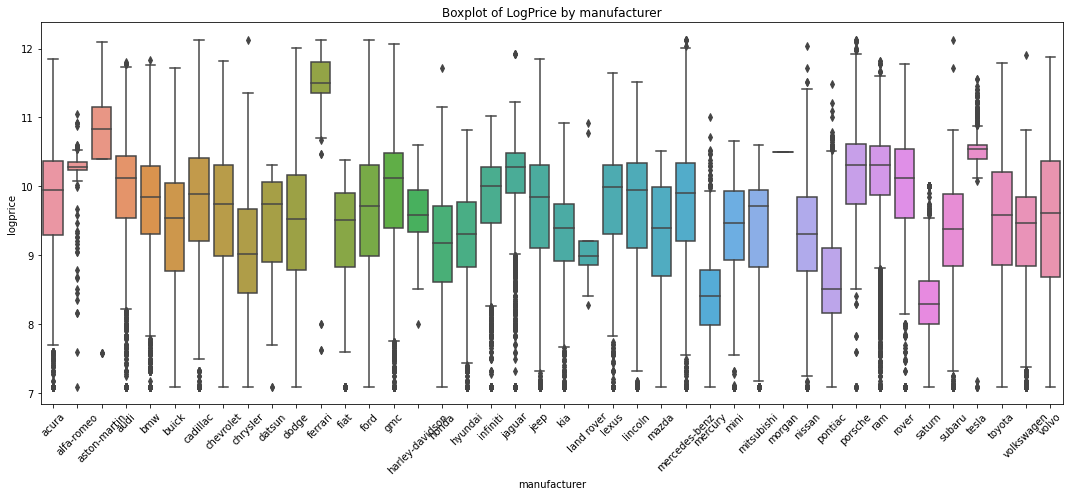

In [64]:
plot_categorical_bar(df, 'manufacturer')
render_boxplot_for_column(df, 'manufacturer')

**Observation:** Ford is the most popular manufacturer with aobut 16% market share.

**Observation:** Manufacturer is important when it comes to price. For example. Ferrari and Aston-Martin have higher prices. Pontiac and Saturn have lower pirices.

### Condition

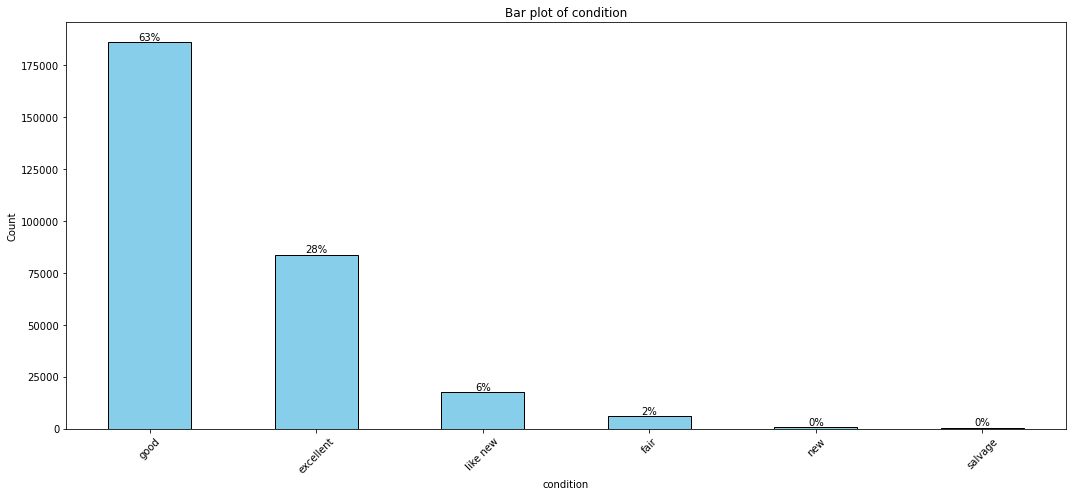

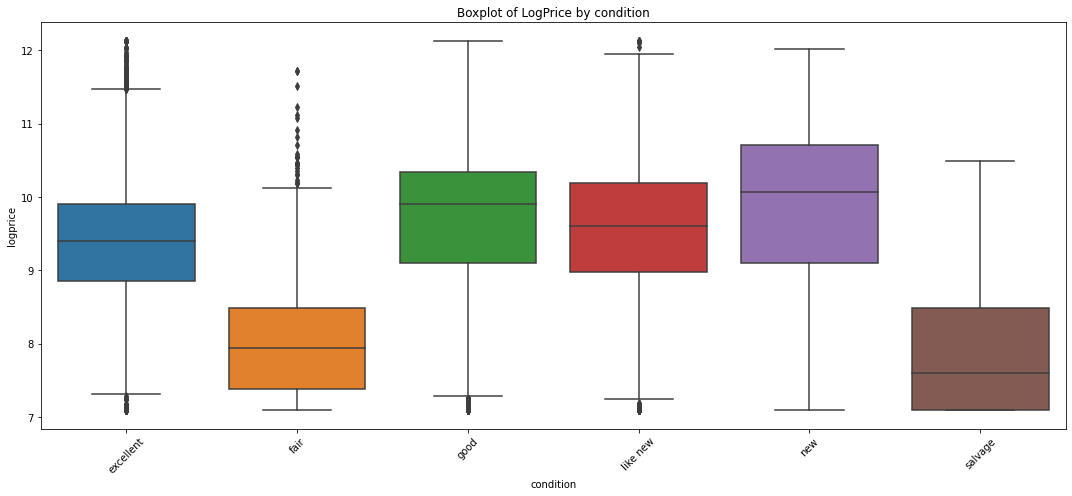

In [65]:
plot_categorical_bar(df, 'condition')
render_boxplot_for_column(df, 'condition')

**Observation:**
- Most common condition is "Good" followed by "Excellent"
- Condition is important for log price
- However, "Good", "Excellent", and "Like New" seem to behave very similarly when it comes to price. We might as well merge these three. 

In [66]:
# Let us transform this into an ordinal variable
# Mapping of condition to numbers
condition_map = {
    'salvage': 0,
    'fair': 1,
    'good': 2,
    'excellent': 2,
    'like new': 2,
    'new': 3
}

# Replace values in the 'condition' column
df['condition'] = df['condition'].replace(condition_map)

# Convert 'condition' column to integers
df['condition'] = df['condition'].astype(int)

df.sample(5)

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,logprice
264169,2018,bmw,2,6 cylinders,gas,39650.0,clean,other,rwd,full-size,other,black,ny,10.462818
422525,2006,acura,2,6 cylinders,gas,180892.0,clean,automatic,4wd,full-size,SUV,white,wi,8.699015
134275,2010,dodge,2,6 cylinders,gas,108142.0,clean,automatic,fwd,full-size,mini-van,silver,id,8.698681
348421,2008,infiniti,2,6 cylinders,gas,256869.0,clean,automatic,rwd,full-size,sedan,black,sc,9.104869
217858,2008,lincoln,2,6 cylinders,gas,250000.0,salvage,automatic,4wd,full-size,SUV,white,mn,8.411833


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295004 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          295004 non-null  int32   
 1   manufacturer  295004 non-null  category
 2   condition     295004 non-null  int32   
 3   cylinders     295004 non-null  category
 4   fuel          295004 non-null  category
 5   odometer      295004 non-null  float64 
 6   title_status  295004 non-null  category
 7   transmission  295004 non-null  category
 8   drive         295004 non-null  category
 9   size          295004 non-null  category
 10  type          295004 non-null  category
 11  paint_color   295004 non-null  category
 12  state         295004 non-null  category
 13  logprice      295004 non-null  float64 
dtypes: category(10), float64(2), int32(2)
memory usage: 19.9 MB


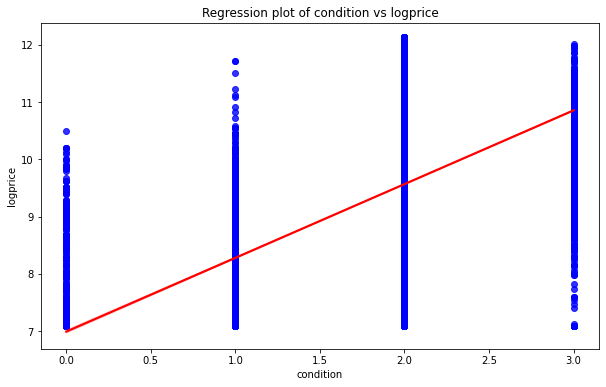

In [68]:
render_regplot(df, 'condition', 'logprice')

**Observation:**
- Price improves as conditiosn improves (with the exception of middle tiers that we merged, which perform the same in terms of price

### Cylinders

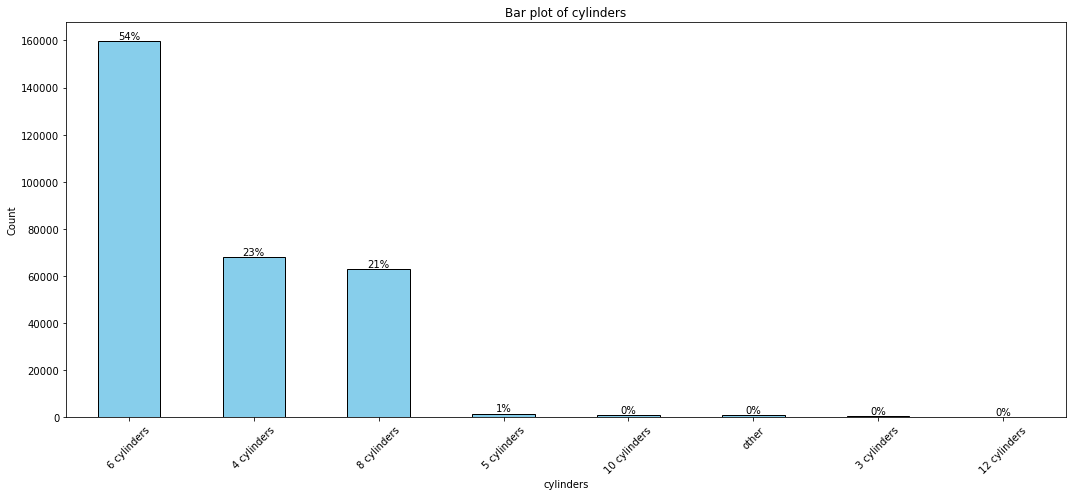

In [69]:
plot_categorical_bar(df, 'cylinders')

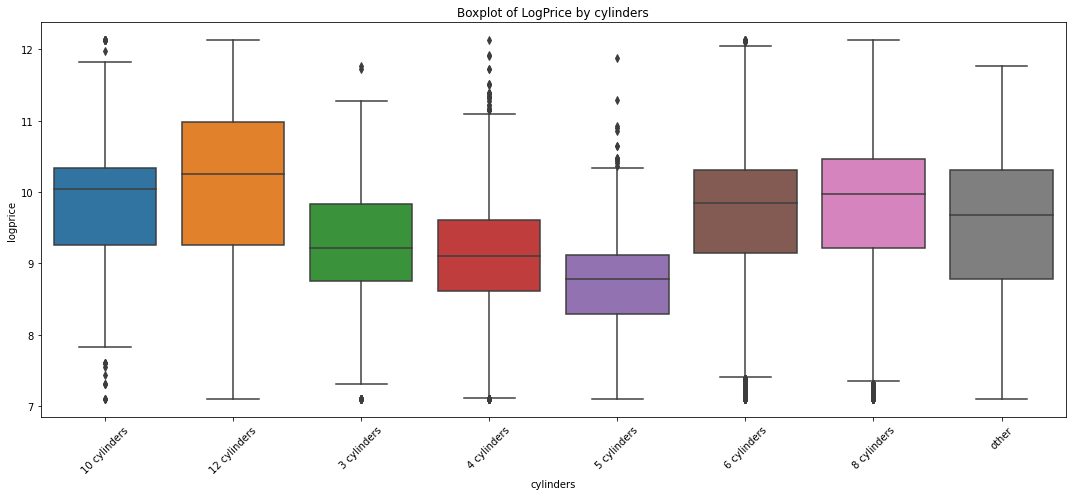

In [70]:
render_boxplot_for_column(df, 'cylinders')

**Observations:**
- V6 is the most popular engine
- Number of cylidersn has a positive relationshiop with price
- "Other" looks a lot like "6 cylinders, so it could probably ge imputed with "6 cylinders"
- We will want to convert this field to an integer. 

In [71]:
#Let us convert these into integers. "Other looks a lot like "6" cylinders, which happens to be the mode anyway.

# Mapping of condition to numbers
cylinders_map = {
    '8 cylinders': 8,
    '6 cylinders': 6, 
    '4 cylinders': 4,
    '5 cylinders': 5,
    'other': 6,
    '3 cylinders': 3,
    '10 cylinders': 10, 
    '12 cylinders': 12
}

# Replace values in the 'condition' column
df['cylinders'] = df['cylinders'].replace(cylinders_map).astype(int)
df.sample(5)

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,logprice
61572,1994,chevrolet,2,8,gas,1000.0,clean,automatic,rwd,full-size,truck,blue,ca,9.769956
29391,2002,toyota,2,8,gas,276618.5,clean,automatic,4wd,full-size,offroad,blue,ca,9.615805
226909,2016,lexus,2,6,gas,26990.0,clean,automatic,4wd,full-size,coupe,white,mt,10.621279
244996,2018,chrysler,2,6,gas,71021.0,clean,other,rwd,full-size,sedan,black,nc,9.932561
353057,2014,dodge,2,6,gas,102365.0,clean,automatic,rwd,full-size,sedan,blue,tn,9.711055


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295004 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          295004 non-null  int32   
 1   manufacturer  295004 non-null  category
 2   condition     295004 non-null  int32   
 3   cylinders     295004 non-null  int32   
 4   fuel          295004 non-null  category
 5   odometer      295004 non-null  float64 
 6   title_status  295004 non-null  category
 7   transmission  295004 non-null  category
 8   drive         295004 non-null  category
 9   size          295004 non-null  category
 10  type          295004 non-null  category
 11  paint_color   295004 non-null  category
 12  state         295004 non-null  category
 13  logprice      295004 non-null  float64 
dtypes: category(9), float64(2), int32(3)
memory usage: 20.7 MB


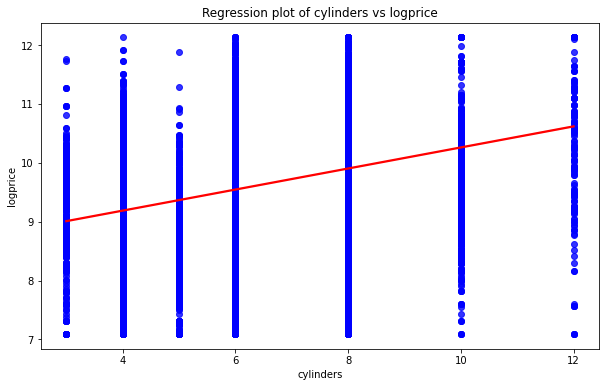

In [73]:
render_regplot(df, 'cylinders', 'logprice')

**Observation:**
- Price has a positive relationship with the number of cyliders, which makes sense

### Title Status

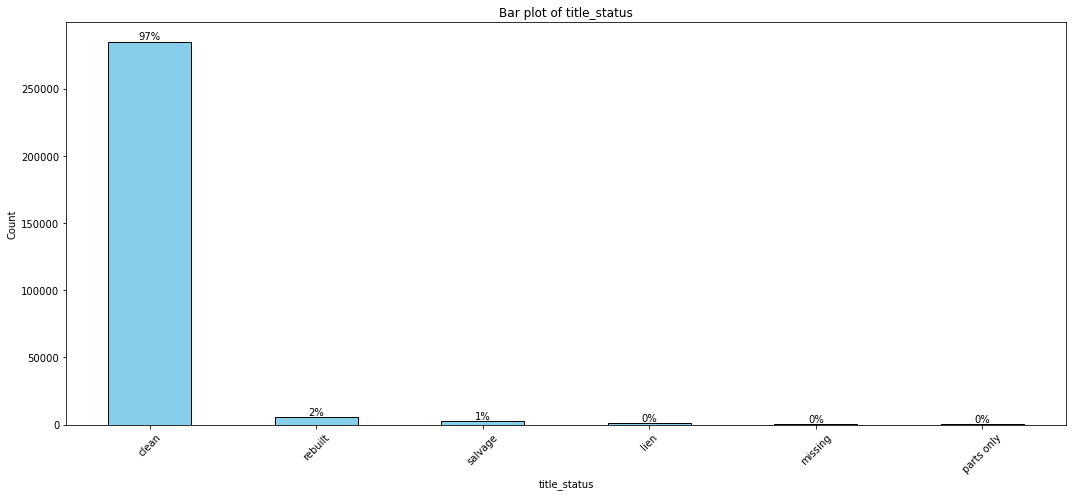

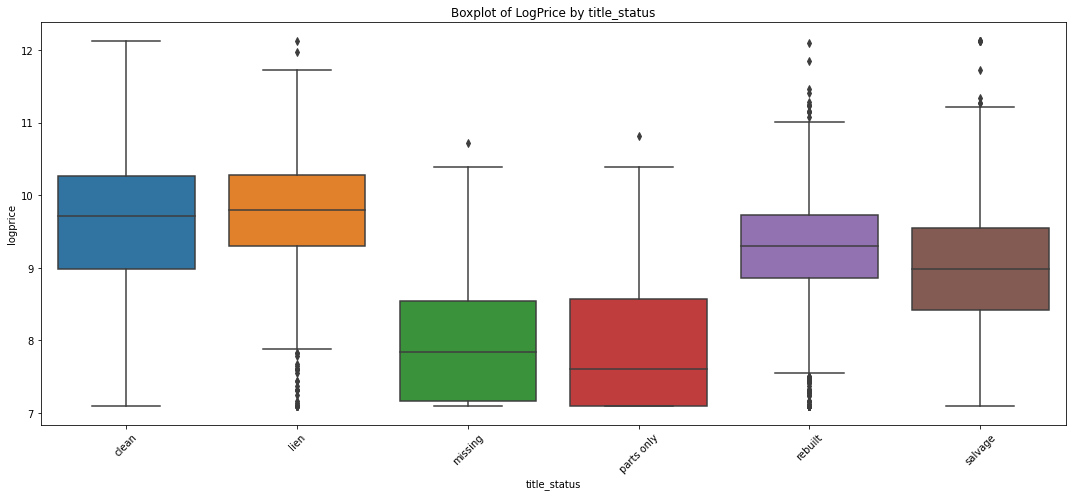

In [74]:
plot_categorical_bar(df, 'title_status')
render_boxplot_for_column(df, 'title_status')

**Observations:**
- Title is important when it comes to price
- Clean, is by far, the most common title
- Clean and Lien behave the same in terms of price
- So do Rebuilt and Salvage
- So do Missing and Parts Only

Let us transform these into 0, 1 and 2--since these are, in essence, ordinary values of the same variable

In [75]:
unique_titles = df['title_status'].unique()
unique_titles

['clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
Categories (6, object): ['clean', 'lien', 'missing', 'parts only', 'rebuilt', 'salvage']

In [76]:
# Let us transform this into an ordinal variable
# Mapping of title to numbers
title_map = {
    'clean': 3,
    'rebuilt': 2, 
    'lien':3, 
    'salvage' :1,
    'missing' :0,
    'parts only': 0
}

# Replace values in the 'title_status' column (and rename it to "title" to be short)
df['title'] = df['title_status'].replace(title_map).astype(int)
df.drop(['title_status'], axis = 1, inplace = True)

df.sample(5)

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,logprice,title
82838,2004,toyota,2,8,gas,267334.0,automatic,4wd,full-size,SUV,grey,co,8.698681,3
127111,2015,hyundai,2,4,gas,52000.0,automatic,4wd,mid-size,SUV,grey,ga,9.581904,3
253560,2002,ford,1,8,diesel,238000.0,automatic,4wd,full-size,pickup,white,nj,8.853665,3
75640,1994,jeep,2,6,gas,1000.0,manual,4wd,full-size,sedan,brown,co,8.411833,3
70363,2012,mercedes-benz,2,6,gas,68470.0,automatic,4wd,compact,coupe,black,ca,10.239781,3


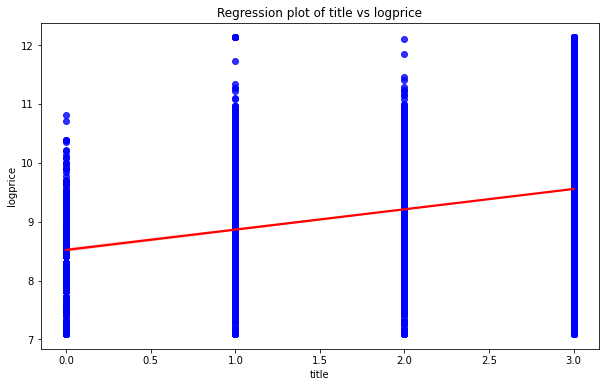

In [77]:
render_regplot(df, 'title', 'logprice')

**Observation:** There seems to be a relationship between title (the transformed variable) and logprice

### Transmission

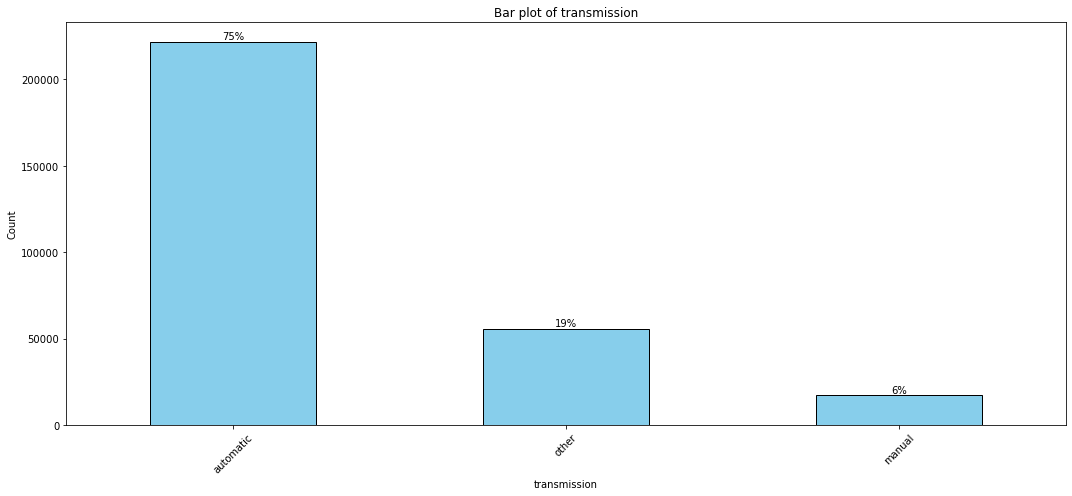

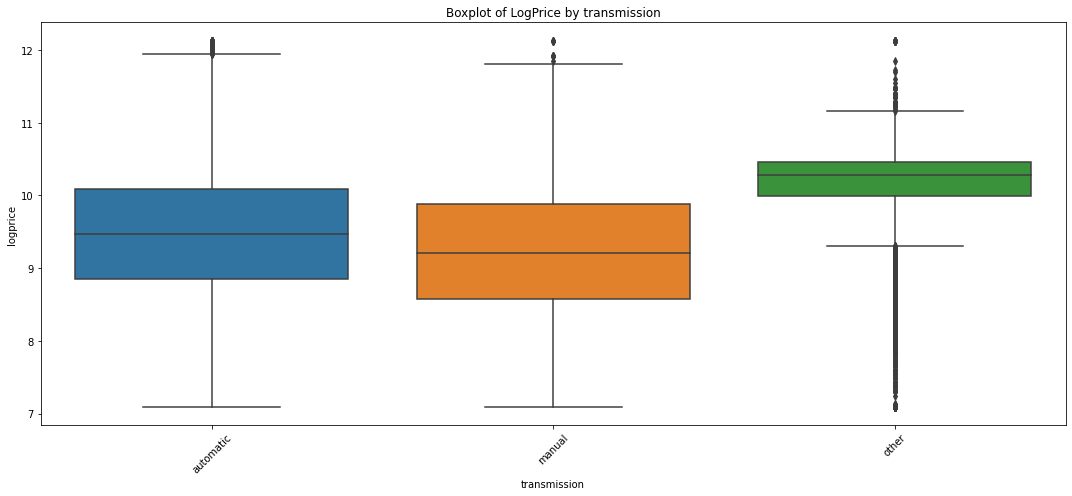

In [78]:
#Now let us look at Transmission
plot_categorical_bar(df, 'transmission')
render_boxplot_for_column(df, 'transmission')

**Observations:**
- Automatic transmission is most common
- Cars with the "Other" transmission has the highest price. Perhaps these are electric cars that have no transmission

### Drive

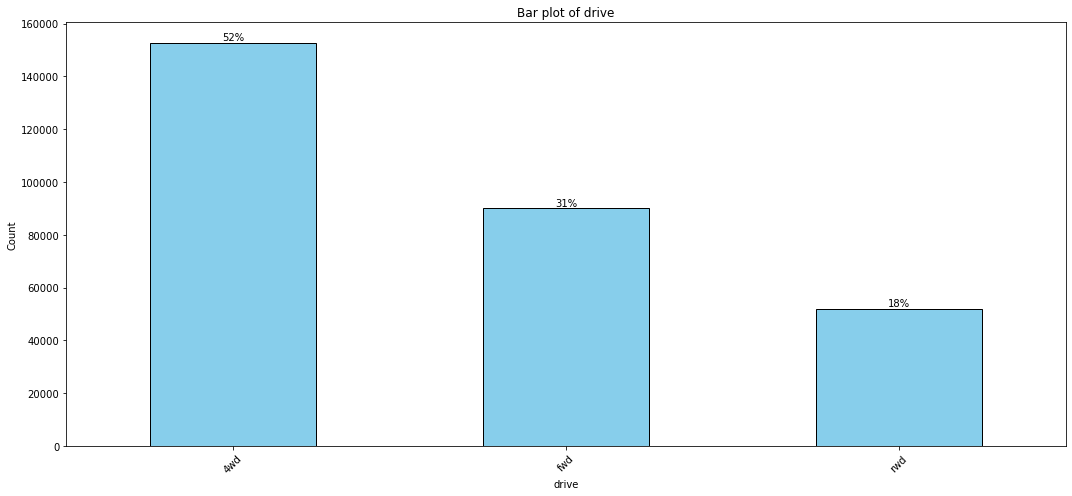

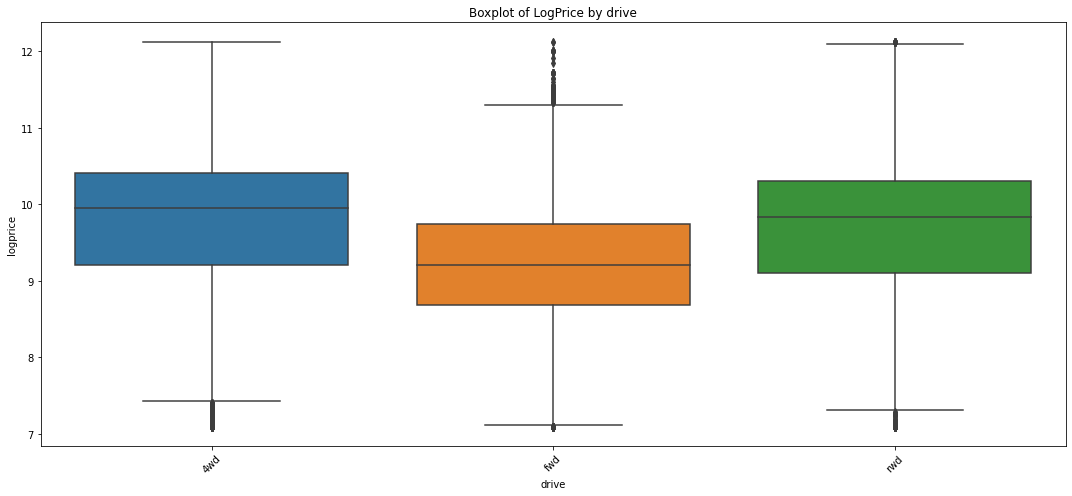

In [79]:
#Now let us look at "drive"
plot_categorical_bar(df, 'drive')
render_boxplot_for_column(df, 'drive')

**Observation:**
- 4 wheel drive is the most common. It is also the most expensive
- fwd (forward wheel drive) is the cheapest

### Size

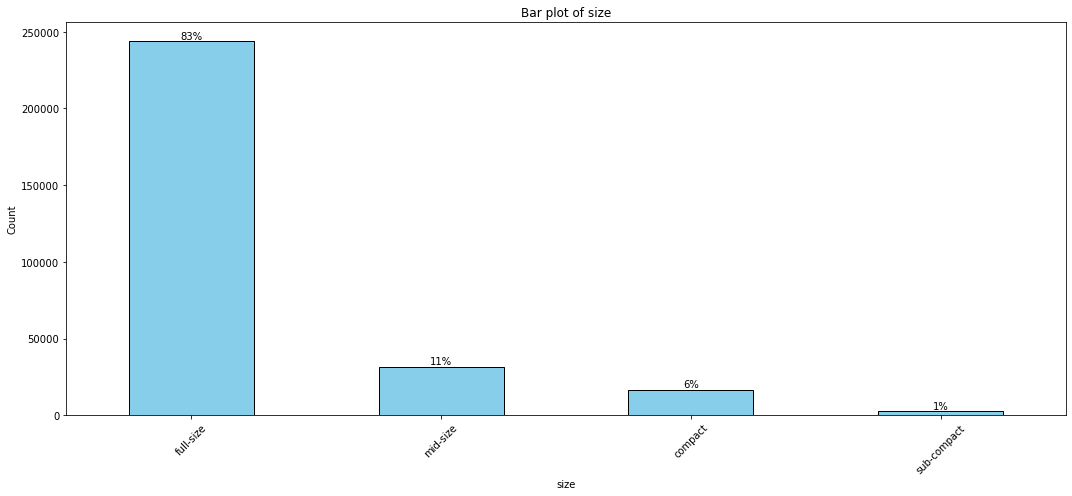

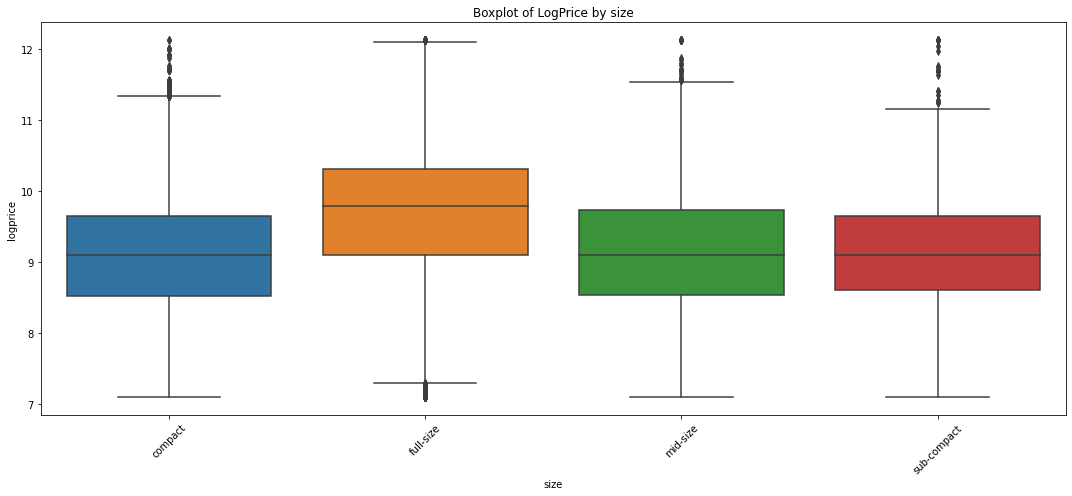

In [80]:
#Now let us look at "size"
plot_categorical_bar(df, 'size')
render_boxplot_for_column(df, 'size')

In [81]:
#Let us convert these into integers, Since this is an ordinary variable

# Mapping of condition to numbers
size_map = {
    'full-size': 3,
    'mid-size': 2, 
    'compact': 1,
    'sub-compact': 0
}

# Replace values in the 'condition' column
df['size'] = df['size'].replace(size_map).astype(int)
df.sample(5)

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,logprice,title
418537,2017,chevrolet,2,4,gas,29448.0,automatic,fwd,3,SUV,silver,wi,7.092646,3
64785,2016,kia,2,4,gas,138343.0,automatic,fwd,3,sedan,black,ca,9.305560,3
114003,2017,gmc,2,6,gas,121215.0,automatic,4wd,3,sedan,white,fl,10.487294,3
55670,2003,lexus,2,6,gas,144000.0,automatic,4wd,3,sedan,silver,ca,8.131531,1
61265,2016,hyundai,2,6,gas,61732.0,other,fwd,3,coupe,white,ca,9.679719,3


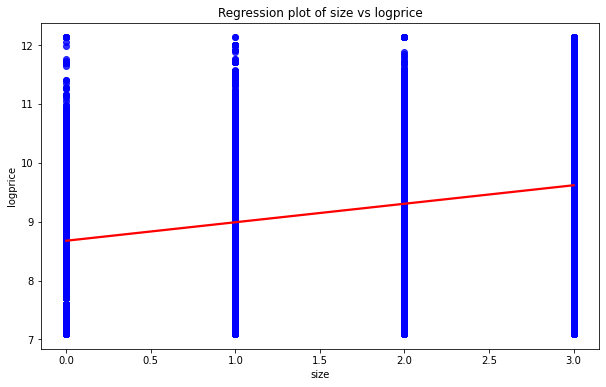

In [82]:
render_regplot(df, 'size', 'logprice')

**Observation:**
- Size has a small impact on price

### Type

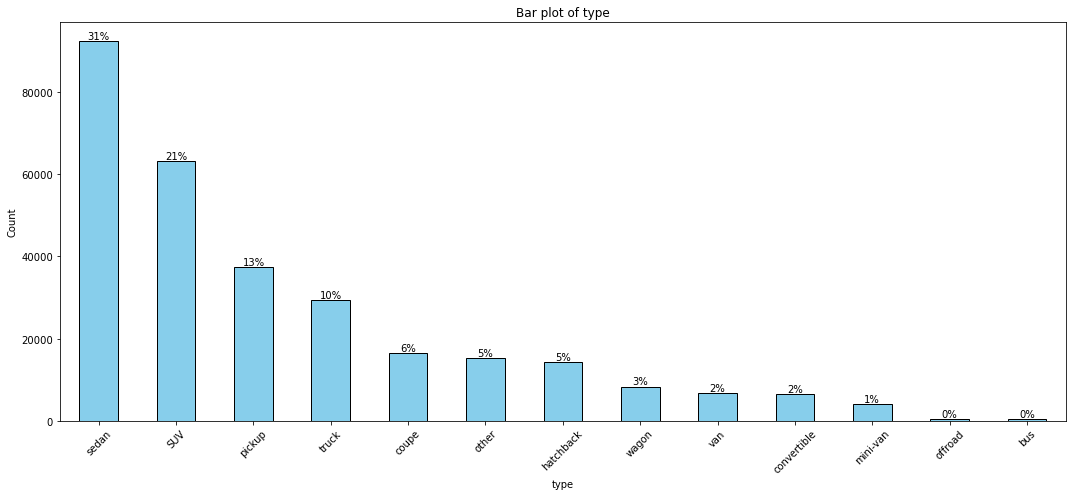

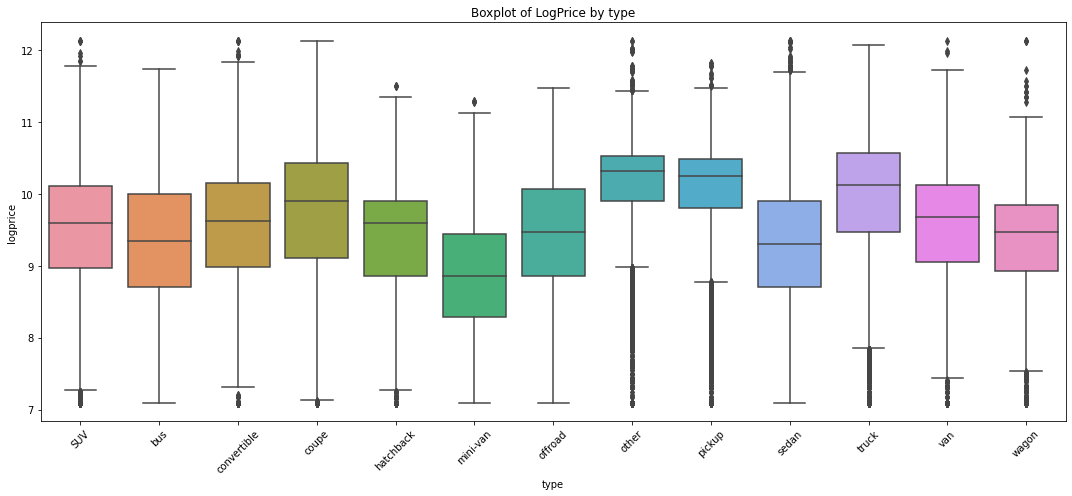

In [83]:
#Now let us look at "type"
plot_categorical_bar(df, 'type')
render_boxplot_for_column(df, 'type')

**Observation:**
- The most common type is Sedan, followed by SUV
- Type is important when it comes to price

### Paint Color

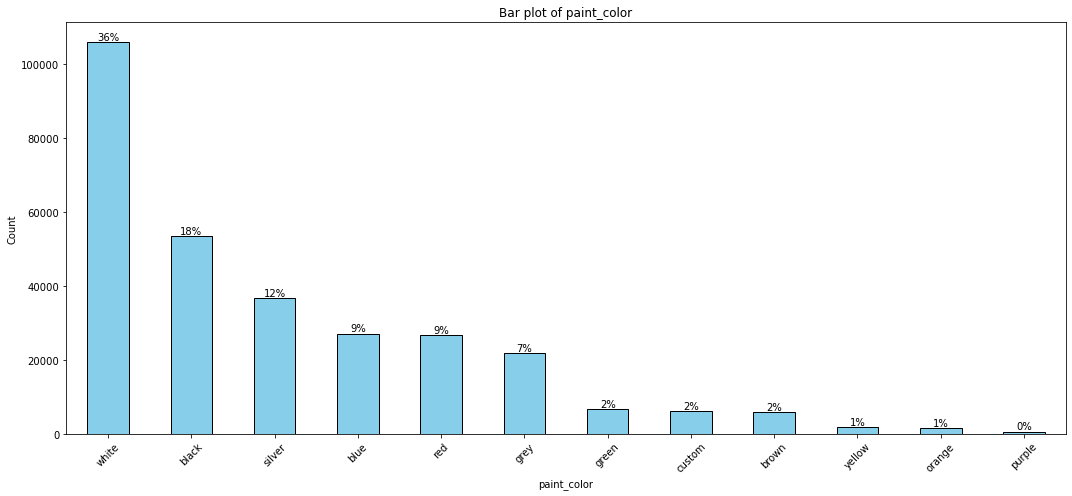

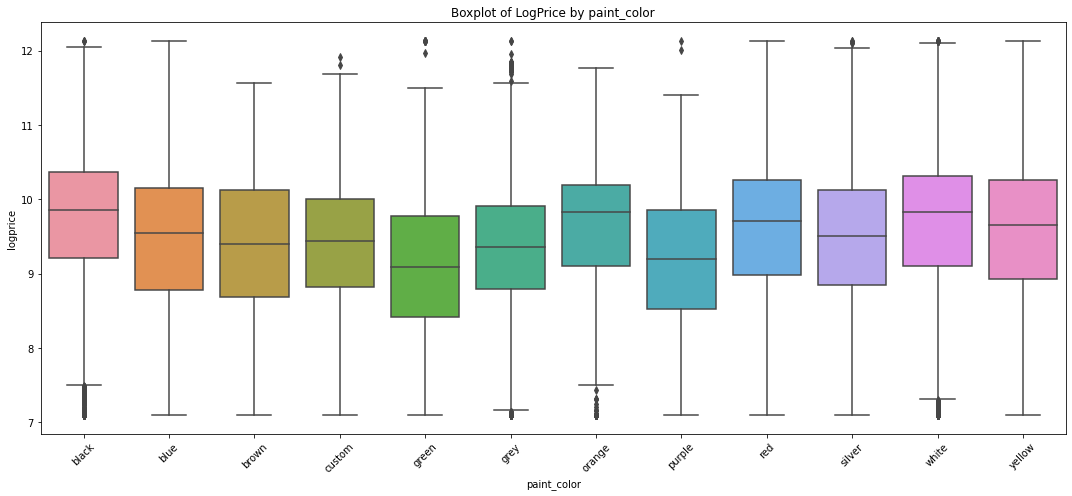

In [84]:
#Now let us look at "paint_color"
plot_categorical_bar(df, 'paint_color')
render_boxplot_for_column(df, 'paint_color')

**Observations:**
- White and Black are the most popular colors
- Colors seem to have little impact on price

### State

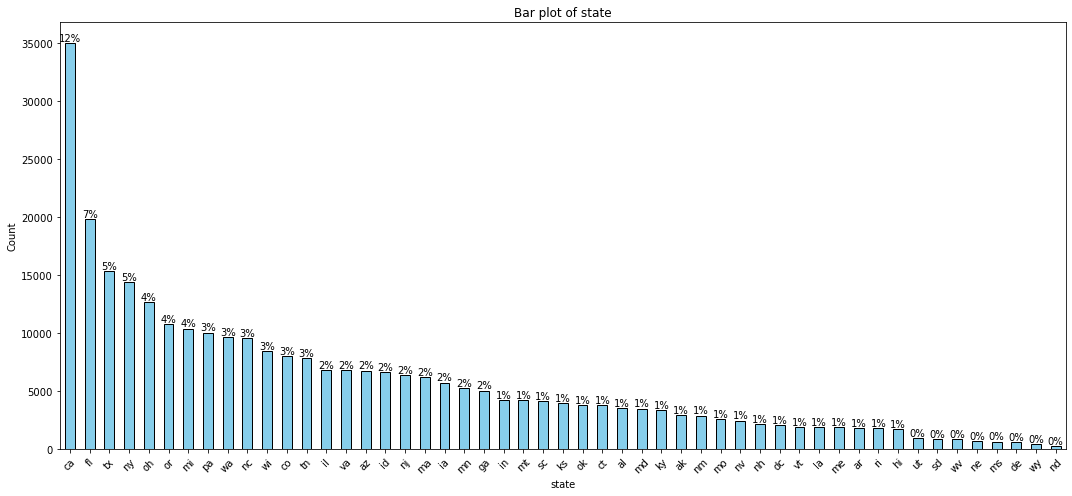

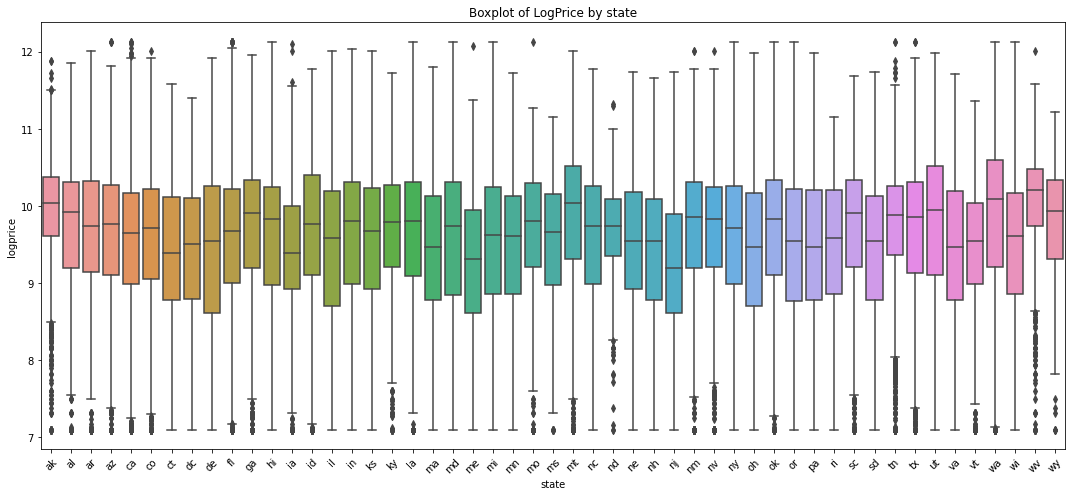

In [85]:
#Now let us look at "state"
plot_categorical_bar(df, 'state')
render_boxplot_for_column(df, 'state')

**Observations:**
- Not surprisingly, California has the most cars in the data set, followed by Florida and Texas
- It is not clear whether State has any impact on price. 

In [86]:
# Print unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\033[1m{column}:\033[0m \n{unique_values}\n")

year: 
[2014 2010 2020 2017 2013 2012 2016 2019 2011 1994 2018 2004 2015 2001
 2006 2003 2008 2007 2005 2009 1998 2002 1995 1999 1996 2021 2000 1997
 2022]

manufacturer: 
['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', ..., 'harley-davidson', 'datsun', 'aston-martin', 'land rover', 'morgan']
Length: 42
Categories (42, object): ['acura', 'alfa-romeo', 'aston-martin', 'audi', ..., 'tesla', 'toyota', 'volkswagen', 'volvo']

condition: 
[2 1 3 0]

cylinders: 
[ 8  6  4  5  3 10 12]

fuel: 
['gas', 'other', 'diesel', 'hybrid', 'electric']
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']

odometer: 
[ 57923.  71229.  19160. ... 176261. 172511.  11065.]

transmission: 
['other', 'automatic', 'manual']
Categories (3, object): ['automatic', 'manual', 'other']

drive: 
['4wd', 'rwd', 'fwd']
Categories (3, object): ['4wd', 'fwd', 'rwd']

size: 
[3 2 1 0]

type: 
['pickup', 'truck', 'other', 'sedan', 'coupe', ..., 'offroad', 'bus', 'convertible', 'wagon', 'van']
Length: 13


## Correlation Table

Let us build a correlation table to examine the data for possible Multicollinearity.

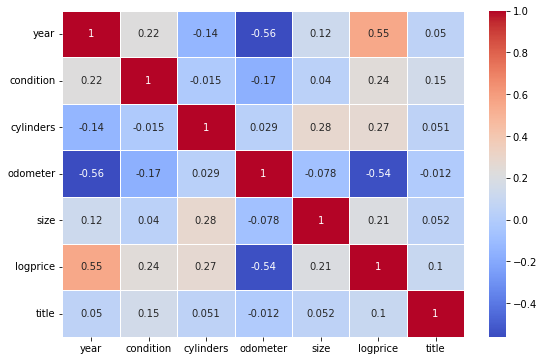

In [87]:
# Compute the correlation matrix for numerical variables.
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=.5, ax=ax)

plt.show()

**Observation:**
- the highest (by absolute value) correlation between the independent variable is between "odometer" and "year" (-0.56). This makes sense. The older the car, the more mileage it typically have on the odometer. However, the correlation of -0.56 is moderate. I believe that we should keep both of these variables

## Data Transformation - Summary

we have transformed our data by:

- changing price to logprice
- deleting records that have too many (>3) NaNs
- imputing the remaining NaNs with Mode or Median for Categorical and Numerical data respectively
- consolidating some of the values of categorical variables
- converting some of the categorical values to numerical, whenever appropriate

We also checked the numerical data for Multicollinearity. 

## Exploratory Data Analysis - Summary

- Based on the table, the most important numerical predictors of the logprice are:
   - Year (the newer, the higher the price)
   - Odometer (the more miles, the lower then logprice.
- Cylinders, Condition and Size appear to have a smaller impact on price

- Categorical variables that impact the price are:
   - Manufacturer
   - Title Status
   - Transmission
   - Type
   - Size
   - Drive
- State and Color does not appear to have strong influence on the price.

________________________________________________________________________________________________________________

# Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

## Dropping the useless variables
Exploratory Data Analysis has shown that two of the variables do not matter. These are:
    - Color
    - State
    
This makes a lot of sense, because:
 - Color is just a cosmetic feature
 - Cars are sold across states. For example, if a certain types of cars become too expensive in one state, a buyer can buy a similar car from another state. Thus, the prices would get equalized by the market
 
These happen to be massive variables with a lot of values. If we keep these values, then we will end up with a lot of one-hot encoded columns. I believe that we will dramatically decrease the unnecessary complexity and prevent overfitting if we drop these columns. 

In [88]:
df2 = df.drop(columns=['paint_color', 'state'])

df2.sample(5)

,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,size,type,logprice,title
167992,2017,ford,2,6,gas,49076.0,automatic,4wd,3,pickup,10.680516,3
33363,2004,mitsubishi,2,6,gas,185700.0,automatic,fwd,3,SUV,8.294050,3
270936,2018,lincoln,2,6,gas,27343.0,other,4wd,3,SUV,10.274706,3
309389,2016,chevrolet,2,4,gas,99728.0,automatic,fwd,1,sedan,9.210340,3
202277,2016,ford,2,6,gas,73553.0,automatic,4wd,3,truck,10.518349,3


## One-hot encoding of remaining categorical variables

We have already transformed some of the categorical variables into numerical. This included:
    - Cylinders (this is a numerical variable that was expressed in words)
    - Condition (in essence, this is an ordinal variable that we transformed to 0, 1, 2, 3)
    - Title (a new ordinary variable, derived from Title Status)
    - Size (an ordinary variable)

Next, we want to one-hot encode the remaining categorical variables. 

In [89]:
#First, let us confirm which are non-numerical by looking at info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295004 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   year          295004 non-null  int32   
 1   manufacturer  295004 non-null  category
 2   condition     295004 non-null  int32   
 3   cylinders     295004 non-null  int32   
 4   fuel          295004 non-null  category
 5   odometer      295004 non-null  float64 
 6   transmission  295004 non-null  category
 7   drive         295004 non-null  category
 8   size          295004 non-null  int32   
 9   type          295004 non-null  category
 10  logprice      295004 non-null  float64 
 11  title         295004 non-null  int32   
dtypes: category(5), float64(2), int32(5)
memory usage: 21.9 MB


In [90]:


# First, lLet us rename some of these into shorter names
column_mapping = {
    'manufacturer': 'make',
    'transmission': 'tr',
}

df2.rename(columns=column_mapping, inplace=True)

# Identify non-numeric columns
non_numeric_columns = df2.select_dtypes(exclude=['number']).columns

# Apply one-hot encoding to the non-numeric columns
dfe = pd.get_dummies(df2, columns=non_numeric_columns)

dfe.sample(5)

,year,condition,cylinders,odometer,size,logprice,title,make_acura,make_alfa-romeo,make_aston-martin,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
363608,2017,2,6,27132.0,3,9.882775,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
369861,2014,2,4,135846.0,2,9.383285,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
297515,2015,2,6,62635.0,3,9.615672,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61961,2019,2,6,13254.0,3,10.308619,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
284511,2020,2,6,26502.0,3,7.092646,3,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [91]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295004 entries, 27 to 426879
Data columns (total 73 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  295004 non-null  int32  
 1   condition             295004 non-null  int32  
 2   cylinders             295004 non-null  int32  
 3   odometer              295004 non-null  float64
 4   size                  295004 non-null  int32  
 5   logprice              295004 non-null  float64
 6   title                 295004 non-null  int32  
 7   make_acura            295004 non-null  uint8  
 8   make_alfa-romeo       295004 non-null  uint8  
 9   make_aston-martin     295004 non-null  uint8  
 10  make_audi             295004 non-null  uint8  
 11  make_bmw              295004 non-null  uint8  
 12  make_buick            295004 non-null  uint8  
 13  make_cadillac         295004 non-null  uint8  
 14  make_chevrolet        295004 non-null  uint8  
 15 

In [92]:
# Let us see the values of each new column in the encoded dataframe
for column in dfe.columns:
    unique_values = dfe[column].unique()
    print(f"\033[1m{column}:\033[0m \n{unique_values}\n")

year: 
[2014 2010 2020 2017 2013 2012 2016 2019 2011 1994 2018 2004 2015 2001
 2006 2003 2008 2007 2005 2009 1998 2002 1995 1999 1996 2021 2000 1997
 2022]

condition: 
[2 1 3 0]

cylinders: 
[ 8  6  4  5  3 10 12]

odometer: 
[ 57923.  71229.  19160. ... 176261. 172511.  11065.]

size: 
[3 2 1 0]

logprice: 
[10.42198368 10.02526261 10.58633184 ...  8.46800295  8.75273951
  9.89611041]

title: 
[3 2 1 0]

make_acura: 
[0 1]

make_alfa-romeo: 
[0 1]

make_aston-martin: 
[0 1]

make_audi: 
[0 1]

make_bmw: 
[0 1]

make_buick: 
[0 1]

make_cadillac: 
[0 1]

make_chevrolet: 
[0 1]

make_chrysler: 
[0 1]

make_datsun: 
[0 1]

make_dodge: 
[0 1]

make_ferrari: 
[0 1]

make_fiat: 
[0 1]

make_ford: 
[0 1]

make_gmc: 
[1 0]

make_harley-davidson: 
[0 1]

make_honda: 
[0 1]

make_hyundai: 
[0 1]

make_infiniti: 
[0 1]

make_jaguar: 
[0 1]

make_jeep: 
[0 1]

make_kia: 
[0 1]

make_land rover: 
[0 1]

make_lexus: 
[0 1]

make_lincoln: 
[0 1]

make_mazda: 
[0 1]

make_mercedes-benz: 
[0 1]

make

### Deleting one of the on-hot encoded values (new variable)
For the new one-hot encoded sets of variables, we can delete one from each set. 
The rationale is that when all other variable of the set are equal to 0, this would be an equivalent of the deleted variable to be equal to 1
This way, we will reduce the redundancy and the number of variables a bit. 

It doesn't matter which one we delete, so let us delete the first value (by alphabet) for each set. These are;

- make_acura
- fuel_diesel
- tr_automatic
- drive_4wd
- type_SUV


In [93]:
columns_to_drop = [
    'make_acura',
    'fuel_diesel',
    'tr_automatic',
    'drive_4wd',
    'type_SUV',]
    
dfe.drop(columns=columns_to_drop, inplace=True)  


In [94]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295004 entries, 27 to 426879
Data columns (total 68 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  295004 non-null  int32  
 1   condition             295004 non-null  int32  
 2   cylinders             295004 non-null  int32  
 3   odometer              295004 non-null  float64
 4   size                  295004 non-null  int32  
 5   logprice              295004 non-null  float64
 6   title                 295004 non-null  int32  
 7   make_alfa-romeo       295004 non-null  uint8  
 8   make_aston-martin     295004 non-null  uint8  
 9   make_audi             295004 non-null  uint8  
 10  make_bmw              295004 non-null  uint8  
 11  make_buick            295004 non-null  uint8  
 12  make_cadillac         295004 non-null  uint8  
 13  make_chevrolet        295004 non-null  uint8  
 14  make_chrysler         295004 non-null  uint8  
 15 

In [95]:
#Let us define our X and y
X = dfe.drop(['logprice'], axis = 1)
y = dfe['logprice']

In [96]:
X.sample(3)

,year,condition,cylinders,odometer,size,title,make_alfa-romeo,make_aston-martin,make_audi,make_bmw,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
409060,2002,2,8,132000.0,3,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
98664,2006,2,6,176000.0,3,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
389180,2015,2,4,98862.0,2,3,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [97]:
y.sample(3)

91549     9.951801
269970    8.174703
14050     9.674074
Name: logprice, dtype: float64

## Splitting the data into Train and Test sets. 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221253 entries, 299931 to 174050
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  221253 non-null  int32  
 1   condition             221253 non-null  int32  
 2   cylinders             221253 non-null  int32  
 3   odometer              221253 non-null  float64
 4   size                  221253 non-null  int32  
 5   title                 221253 non-null  int32  
 6   make_alfa-romeo       221253 non-null  uint8  
 7   make_aston-martin     221253 non-null  uint8  
 8   make_audi             221253 non-null  uint8  
 9   make_bmw              221253 non-null  uint8  
 10  make_buick            221253 non-null  uint8  
 11  make_cadillac         221253 non-null  uint8  
 12  make_chevrolet        221253 non-null  uint8  
 13  make_chrysler         221253 non-null  uint8  
 14  make_datsun           221253 non-null  uint8  


In [100]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73751 entries, 98938 to 345452
Data columns (total 67 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  73751 non-null  int32  
 1   condition             73751 non-null  int32  
 2   cylinders             73751 non-null  int32  
 3   odometer              73751 non-null  float64
 4   size                  73751 non-null  int32  
 5   title                 73751 non-null  int32  
 6   make_alfa-romeo       73751 non-null  uint8  
 7   make_aston-martin     73751 non-null  uint8  
 8   make_audi             73751 non-null  uint8  
 9   make_bmw              73751 non-null  uint8  
 10  make_buick            73751 non-null  uint8  
 11  make_cadillac         73751 non-null  uint8  
 12  make_chevrolet        73751 non-null  uint8  
 13  make_chrysler         73751 non-null  uint8  
 14  make_datsun           73751 non-null  uint8  
 15  make_dodge    

## Establishing a baseline (Average) model

In [101]:
# 1. Calculate the average log price in the training set
avg_logprice = y_train.mean()

# 2. Calculate residuals (on the test set)
residuals = y_test - avg_logprice

# 3. Calculate RMSE
rmse = (residuals**2).mean()**0.5
print(f'Baseline (Average) RMSE: {rmse}')

# 4. Calculate RMA
rma = residuals.abs().mean()**0.5
print(f'Baseline (Average) RMA: {rma}')

Baseline (Average) RMSE: 0.904892361538039
Baseline (Average) RMA: 0.8548331118511051


## Model 1: Ridge Regression with Standard Scaler and Grid Search 

In [102]:
# Creating a pipe with Standard Scaler and Alpha hyperparameter Grid Search
ridge_param_dict = {'ridge__alpha': np.logspace(0, 10, 50)}
ridge_pipe = Pipeline([('scaler', StandardScaler()), 
                      ('ridge', Ridge())])
ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_param_dict)
ridge_grid.fit(X_train, y_train)
ridge_train_preds = ridge_grid.predict(X_train)
ridge_test_preds = ridge_grid.predict(X_test)
ridge_train_mse = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse = mean_squared_error(y_test, ridge_test_preds)

ridge_pipe

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [103]:
# Let us see the best Alpha parameter
best_alpha = ridge_grid.best_params_['ridge__alpha']
print(f"Best value of alpha: {best_alpha}")

Best value of alpha: 42.91934260128778


In [104]:
#Let us see the RMSes for this model:
print(f'Train MSE: {ridge_train_mse}')
print(f'Test MSE: {ridge_test_mse}')

Train MSE: 0.3211000451294205
Test MSE: 0.3225929061647456


In [105]:
#To compare Apples to Apples, let us calculate RMSE for this model
Ridge_Train_RMSE = (ridge_train_mse)**0.5
Ridge_Test_RMSE = (ridge_test_mse)**0.5

print(f'Ridge Train RMSE: {Ridge_Train_RMSE}')
print(f'Ridge Test RMSE: {Ridge_Test_RMSE}')

Ridge Train RMSE: 0.566656902481052
Ridge Test RMSE: 0.5679726280066194


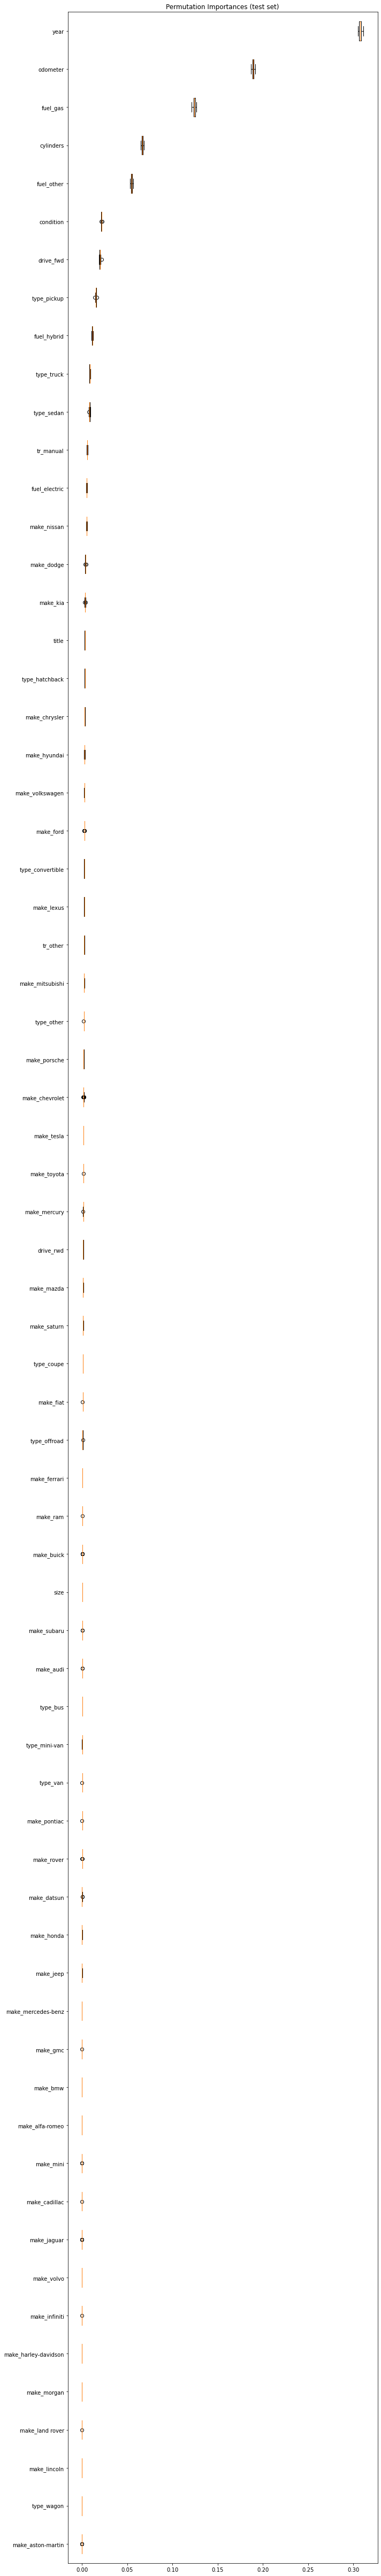

In [106]:
# Now let us see the permutation importance for the Ridge Regression model
result = permutation_importance(ridge_grid, X_test, y_test, n_repeats=30, random_state=42)

# Sort the features based on their importance
sorted_idx = result.importances_mean.argsort()

# Plotting the permutation importances
plt.figure(figsize=(10, len(X_test.columns)))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [112]:
# Row let us get the coefficients
# Get the best estimator from the grid search
best_ridge_pipe = ridge_grid.best_estimator_

# Access the 'ridge' step and retrieve the coefficients
ridge_coefficients = best_ridge_pipe.named_steps['ridge'].coef_

# Display the coefficients
for i, coef in enumerate(ridge_coefficients):
    print(f"Coefficient for feature {i}: {coef}")

Coefficient for feature 0: 0.35610637052782124
Coefficient for feature 1: 0.0912967714130221
Coefficient for feature 2: 0.16541548610613835
Coefficient for feature 3: -0.2790798011474413
Coefficient for feature 4: 0.015642057688281526
Coefficient for feature 5: 0.036332807009326104
Coefficient for feature 6: 0.005646105599343679
Coefficient for feature 7: 0.0013736777203190004
Coefficient for feature 8: 0.01659017461510657
Coefficient for feature 9: -0.004601693351688086
Coefficient for feature 10: -0.016008386695129908
Coefficient for feature 11: -0.005491009478797403
Coefficient for feature 12: -0.02766695269708579
Coefficient for feature 13: -0.036302269323723234
Coefficient for feature 14: 0.008588211677951237
Coefficient for feature 15: -0.0367277313073569
Coefficient for feature 16: 0.021126315287522183
Coefficient for feature 17: -0.02186316219744158
Coefficient for feature 18: -0.03248561025612152
Coefficient for feature 19: -0.0077563957254419705
Coefficient for feature 20: -0

**Observations:**
- Ridge Regression with the best alpha (42.91934260128778) produced better RMSes than the baseline.
- Compared to the Average, the RMSEs on both the Training and Test are significantly lower (0.579 vs. 0.905). Thus, the Ridge model gives us a better prediction than simple average.
- RMSEs for Test was about the same as for Train set, which means that there is not much overfitting.
- The most important features were:
   - Year
   - Odometer
   - Type of fuel
   - Number of cylinders
   - Condition

## Model 2: OLS Regression with Sequential Feature Selector

In [114]:
# Let us define the selector pipleline
selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [115]:
# Let us try up to 4 features in our grid search (to keep the compute cost reasonable)
param_dict = {'selector__n_features_to_select': [2, 3, 4]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)

In [116]:
# let us see the best selector model
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_

In [117]:
print(coefs)

[ 5.92831116e-02  1.67689119e-01 -4.52634810e-06 -3.87396763e-01]


In [118]:
# Now let us print the MSEs
print(f'Selector Train MSE: {selector_train_mse}')
print(f'Selector Test MSE: {selector_test_mse}')

Selector Train MSE: 0.3889579655177094
Selector Test MSE: 0.3906316187462857


In [119]:
#To compare Apples to Apples, let us calculate RMSE for this model
Selector_Train_RMSE = (selector_train_mse)**0.5
Selector_Test_RMSE = (selector_test_mse)**0.5

print(f'Selector Train RMSE: {Selector_Train_RMSE}')
print(f'Selector Test RMSE: {Selector_Train_RMSE}')

Selector Train RMSE: 0.6236649465199318
Selector Test RMSE: 0.6236649465199318


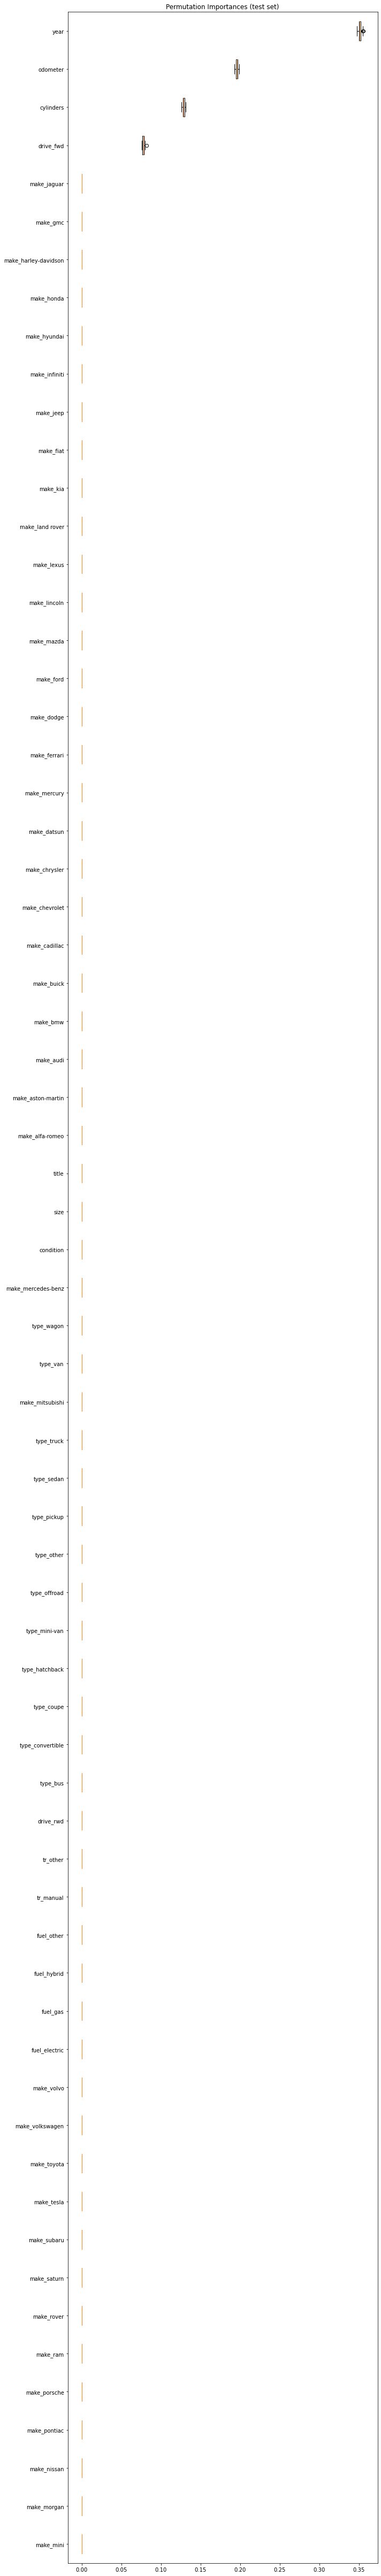

In [120]:
# Now let us see the permutation importance for the Sequential Selector Regression model
result = permutation_importance(selector_grid, X_test, y_test, n_repeats=30, random_state=42)

# Sort the features based on their importance
sorted_idx = result.importances_mean.argsort()

# Plotting the permutation importances
plt.figure(figsize=(10, len(X_test.columns)))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

**Observations:**
- Sequential Feature Selector Grid Search was extraordinary slow and expensive when it comes to compute power. I had to use up over 6k seconds of high-performance compute on Anaconda Cloud (cost me $25 just to run the calculation), after which I spend a lot of time running this on my local machine.
- Sequential Selector performed slightly worse than Ridge:
    - Test RMSE for Selector was 0.5987 vs. 0.5679. Of course, this could be subject of random luck of how Train vs Test data got split.
- The most important features were somewhat similar to Ridge:
    - Year
    - Odometer
    - Cylinders
    - Type of fuel
    - Type of drive
    - Condition

## Model 3: Lasso with Polynomial Features and Standard Scaler

**Note:** An attempt to use Degree 3 polynomial was not successful, because it required 90.2 GiB of memory, and I only have 64 on my local computer. The following is a 2 degree polynomial

In [121]:
#Let us define a Lasso pipe with 2nd degree polynomial features (to keep the compute costs in check)
lasso_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_
print(lasso_coefs)
lasso_pipe

[ 0.  0.  0. ... -0.  0. -0.]


Pipeline(steps=[('polyfeatures', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

In [122]:
#Let us calculate the MSEs
lasso_train_mse = mean_squared_error(y_train, lasso_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, lasso_pipe.predict(X_test))

In [123]:
#To compare Apples to Apples, let us calculate RMSE for this model
Lasso_Train_RMSE = (lasso_train_mse)**0.5
Lasso_Test_RMSE = (lasso_test_mse)**0.5

print(f'Lasso Train RMSE: {Lasso_Train_RMSE}')
print(f'Lasso Test RMSE: {Lasso_Train_RMSE}')

Lasso Train RMSE: 0.9065176462579781
Lasso Test RMSE: 0.9065176462579781


**Observation:**
    - The Lasso Test RMSE was not great. It was far lower than either the Ridge or the Sequetial Selector Models' RMSE.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Models**
The best model that we were able to produce so far was Ridge Regression with the value of alpha: 42.91934260128778.
It performed equaly well on both the Training data set and the Test data set, which it ha not seen. This indicates the fact that Ridge regression prevented overfitting.

Sequential Feature Selection was the 2nd best performing model. However, it weas computationally very ineficient. It was the slowest from the two.

The Lasso regression performed the worst among the three models. 

Here are the summaries of RMSEs for each of thre models:

**Ridge:**
- Ridge Train RMSE: 0.567
- Ridge Test RMSE: 0.568

**Sequential Feature Selector:**
- Sequential Selector Train RMSE: 0.624
- Sequential Selector Test RMSE: 0.624

**Lasso:**
- Lasso Train RMSE: 0.907
- Lasso Test RMSE: 0.907

**Feature Importance**
The Feature importance among the three models was very similar. It was also consistent with the Exploratory Data Analysis above. The most important features were that all of the models shared were:

 - Year
 - Condition
 - Odometer
 - Cylinders
 - Type of fuel
 - Title
 - Make (manufacturer) of the car.



### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Dear Client,

Afer the extensive data cleanup effort, the exploratory data analysis and after building three different regression models, I have concluded that the following features are most important in predicting the price of the car:
- Year (the newer, the higher the price)
- Condition (the better, the higher the price)
- Cylinders (the more, the higher the price)
- Odometer (the lower the mileage, the higher the price)
- Type of fuel ("other", such as electric was best)
- Make (manufacturer): some are more expensive, and others are cheap


The best performing model for predicting the price of a car, was Ridge Regression with Alpha = 42.919. The Ridge Regression uses all of the available model parameters, but prevents overfitting by downplaying the importance of the parameters. This makes this model give good predictions on the data that it has not seen, such as the Test data set or the real world data.

The model performacne is measured in Root Mean Squared Error (RMSE). The Ridge Regression model produced RMSE of 0.567.

You are welcome to use this model whenever you want to predict the price of cars. 

The model performance can and should be improved in the future via more accurate 

The following were the features that the best Ridge Regression model with their corresponding coefficients:

    0   year: 0.35610637052782124
    1   condition: 0.0912967714130221
    2   cylinders: 0.16541548610613835
    3   odometer: -0.2790798011474413
    4   size: 0.015642057688281526
    5   title: 0.036332807009326104
    6   make_alfa-romeo: 0.005646105599343679
    7   make_aston-martin: 0.0013736777203190004
    8   make_audi: 0.01659017461510657
    9   make_bmw: -0.004601693351688086
    10  make_buick: -0.016008386695129908
    11  make_cadillac: -0.005491009478797403
    12  make_chevrolet: -0.02766695269708579
    13  make_chrysler: -0.036302269323723234
    14  make_datsun: 0.008588211677951237
    15  make_dodge: -0.0367277313073569
    16  make_ferrari: 0.021126315287522183
    17  make_fiat: -0.02186316219744158
    18  make_ford: -0.03248561025612152
    19  make_gmc: -0.0077563957254419705
    20  make_harley-davidson: -0.0005576007446695917
    21  make_honda: -0.006544167883423729
    22  make_hyundai: -0.03569456449196106
    23  make_infiniti: -0.000869641604046785
    24  make_jaguar: -0.003815578496814698
    25  make_jeep: -0.009698266964836689
    26  make_kia: -0.036648988215852996
    27  make_land rover: 0.0001815190900496453
    28  make_lexus: 0.03238017816257291
    29  make_lincoln: 0.0012670955806414882
    30  make_mazda: -0.022982787111301816
    31  make_mercedes-benz: 0.006492125408135606
    32  make_mercury: -0.02598096021286774
    33  make_mini: -0.00707288147090442
    34  make_mitsubishi: -0.033139800001109
    35  make_morgan: 0.002996337988204665
    36  make_nissan: -0.045088127302030136
    37  make_pontiac: -0.011479822966360484
    38  make_porsche: 0.026696471118585852
    39  make_ram: -0.01748370240635555
    40  make_rover: 0.009893361851987826
    41  make_saturn: -0.023302569245781942
    42  make_subaru: -0.013519459112599223
    43  make_tesla: 0.023356012268510376
    44  make_toyota: 0.02503193365889552
    45  make_volkswagen: -0.03564909753565984
    46  make_volvo: -0.0011267852299690602
    47  fuel_electric: -0.04542964095801256
    48  fuel_gas: -0.2259952439117115
    49  fuel_hybrid: -0.06910967622470997
    50  fuel_other: -0.1516596277068553
    51  tr_manual: 0.04682881447609341
    52  tr_other: 0.03270026881464663
    53  drive_fwd: -0.09031948362234074
    54  drive_rwd: 0.0241878599509725
    55  type_bus: -0.013221051321766935
    56  type_convertible: 0.03201291471377096
    57  type_coupe: 0.01839553230984127
    58  type_hatchback: -0.0365712537227965
    59  type_mini-van: -0.01386177505851913
    60  type_offroad: 0.015477643806543344
    61  type_other: 0.030898098542237906
    62  type_pickup: 0.08028954870630044
    63  type_sedan: -0.057000932558437224
    64  type_truck: 0.05897950976961168
    65  type_van: 0.012812703284642528
    66  type_wagon: -0.004829400141209407

The model is very easy to interpret and easy to use.

- Positive coefficients increase the log price.
- Negative coefficients decrease the log price

When deploying the model, you need to:

    1) get the value of each feature
    2) multiply the value by the corresponding coefficient, as listed above
    3) Sum up the results. This will give you the extimate log price of the car. 
    4) Then you would need to take an exponent of that to arrive to the estimated price in USD.

Please note that Many of these features will be equal to 0 most of the time. For example, Only one of the "Make" features will be equal to 1, and the rest to 0

Finally, please note that the following values were deliberately excluded from the features for modeling purposes:
- make_acura
- fuel_diesel
- tr_automatic
- drive_4wd
- type_SUV

You can use them as "default" values. When the car falls under each of these respective values, all other values from the same group become equal to 0. For example, when the car make is "acura", you need to set the values of all of the other makes to 0. 

The calculations should be easy to automate, for example, via JavaScript file on a we page or via a mobile app.

Thank you!